In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from WGAN import critic, generator, WGAN

In [2]:
latent_dim = 100

def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows*image_grid_columns, latent_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5*gen_imgs + 0.5
    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize=(4, 4), sharex=True, sharey=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

In [3]:
n_critic = 5
clip_value = 0.01

def train(epochs, batch_size=128, sample_interval=50):
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    valid = -np.ones((batch_size, 1))
    fake = np.ones((batch_size, 1))

    for epoch in range(epochs):

        for _ in range(n_critic):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
                
            z = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(z)

            d_loss_real = critic.train_on_batch(imgs, valid)
            d_loss_fake = critic.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

            for l in critic.layers:
                weights = l.get_weights()
                weights = [np.clip(w, -clip_value, clip_value) for w in weights]
                l.set_weights(weights)

        g_loss = WGAN.train_on_batch(z, valid)
            
        print (f"{epoch} [D loss: {1 - d_loss[0]}] [G loss: {1 - g_loss[0]}]")

        if epoch % sample_interval == 0:
            sample_images(generator)

0 [D loss: 0.9999100087588886] [G loss: 1.000055038901337]


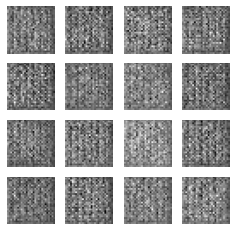

1 [D loss: 0.9999180402810453] [G loss: 1.0001467370602768]
2 [D loss: 0.9999181189996307] [G loss: 1.0001664815790718]
3 [D loss: 0.999917707653367] [G loss: 1.0001711481745588]
4 [D loss: 0.9999217516742647] [G loss: 1.0001729723298922]
5 [D loss: 0.9999212870025076] [G loss: 1.0001784389896784]
6 [D loss: 0.9999192803079495] [G loss: 1.0001804923231248]
7 [D loss: 0.9999237735755742] [G loss: 1.0001969361910596]
8 [D loss: 0.9999238900345517] [G loss: 1.0001828199019656]
9 [D loss: 0.9999193835465121] [G loss: 1.000193890184164]
10 [D loss: 0.9999256396622513] [G loss: 1.0001999919186346]
11 [D loss: 0.99993000280665] [G loss: 1.000188302306924]
12 [D loss: 0.9999284972873284] [G loss: 1.0001729416690068]
13 [D loss: 0.9999308691476472] [G loss: 1.0001814068527892]
14 [D loss: 0.9999345432515838] [G loss: 1.0001707134506432]
15 [D loss: 0.9999315622262657] [G loss: 1.0001593395427335]
16 [D loss: 0.9999299749397323] [G loss: 1.0001587488513906]
17 [D loss: 0.9999377118801931] [G los

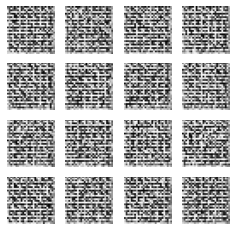

51 [D loss: 1.0000052261311794] [G loss: 1.00002931355084]
52 [D loss: 1.0000043450854719] [G loss: 1.0000282000983134]
53 [D loss: 1.0000141737400554] [G loss: 1.0000389611086575]
54 [D loss: 1.0000207158009289] [G loss: 1.0000298197264783]
55 [D loss: 1.0000405242899433] [G loss: 1.000037863770558]
56 [D loss: 1.0000517223597853] [G loss: 1.000030508292184]
57 [D loss: 1.0000423814999522] [G loss: 1.0000188008234545]
58 [D loss: 1.00005289366527] [G loss: 1.0000317517406074]
59 [D loss: 1.0000776697561378] [G loss: 1.0000318080928992]
60 [D loss: 1.000121805627714] [G loss: 1.000019236402295]
61 [D loss: 1.0001118052314268] [G loss: 1.0000062894682742]
62 [D loss: 1.0001509815192549] [G loss: 1.0000025886997719]
63 [D loss: 1.000169367485796] [G loss: 1.0000027193955248]
64 [D loss: 1.0001453679651604] [G loss: 1.000001262387741]
65 [D loss: 1.0002252670528833] [G loss: 0.9999803239552421]
66 [D loss: 1.0002333427546546] [G loss: 1.0000109511274786]
67 [D loss: 1.000268253563263] [G 

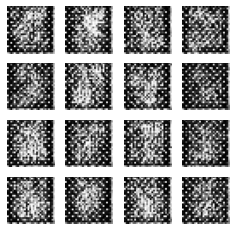

101 [D loss: 1.000241306843236] [G loss: 1.0009228879935108]
102 [D loss: 1.0002273716963828] [G loss: 1.0008069990435615]
103 [D loss: 0.999974271573592] [G loss: 1.0008980763377622]
104 [D loss: 0.9999829482403584] [G loss: 1.0011546208988875]
105 [D loss: 0.9998572344193235] [G loss: 1.0008778686169535]
106 [D loss: 1.0000926468055695] [G loss: 1.0010476593161002]
107 [D loss: 1.0000907988869585] [G loss: 1.001105156261474]
108 [D loss: 1.0001085976255126] [G loss: 1.0010945447720587]
109 [D loss: 1.0000654475297779] [G loss: 1.0011867131106555]
110 [D loss: 1.0000105850049295] [G loss: 1.0012272296007723]
111 [D loss: 1.0000396583927795] [G loss: 1.0013320456491783]
112 [D loss: 0.9999844196718186] [G loss: 1.0012567290104926]
113 [D loss: 1.000019031809643] [G loss: 1.0012847429607064]
114 [D loss: 0.9999309917911887] [G loss: 1.001321867806837]
115 [D loss: 0.99984863930149] [G loss: 1.0013528594281524]
116 [D loss: 0.9997738677193411] [G loss: 1.001320578623563]
117 [D loss: 0.9

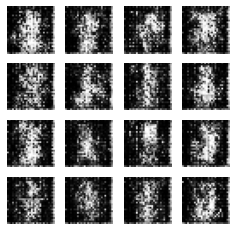

151 [D loss: 0.9999697822640883] [G loss: 1.0001559475495014]
152 [D loss: 0.9999606204219162] [G loss: 1.0001584831625223]
153 [D loss: 0.9999664190181647] [G loss: 1.0001311242813244]
154 [D loss: 0.9999746859466541] [G loss: 1.0001419683394488]
155 [D loss: 0.9999691848352086] [G loss: 1.0001766085333657]
156 [D loss: 0.9999766427717987] [G loss: 1.0001370256068185]
157 [D loss: 0.9999596179113723] [G loss: 1.0001411860866938]
158 [D loss: 0.9999605808552587] [G loss: 1.0001333668187726]
159 [D loss: 0.999955656741804] [G loss: 1.0001349943922833]
160 [D loss: 0.9999607655045111] [G loss: 1.0001178042730317]
161 [D loss: 0.99996729564009] [G loss: 1.0001072252634913]
162 [D loss: 0.9999751328505226] [G loss: 1.000109425316623]
163 [D loss: 0.9999762829538668] [G loss: 1.0000911130773602]
164 [D loss: 0.9999716465245001] [G loss: 1.0001105195406126]
165 [D loss: 0.9999737657781225] [G loss: 1.000099982280517]
166 [D loss: 0.9999557443588856] [G loss: 1.0001050158971339]
167 [D loss: 

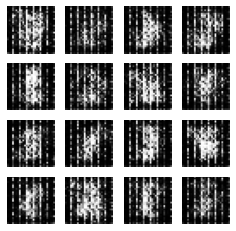

201 [D loss: 0.999972568708472] [G loss: 1.0000879916915437]
202 [D loss: 0.9999860768584767] [G loss: 1.0001084795803763]
203 [D loss: 0.9999773009549244] [G loss: 1.0000921304381336]
204 [D loss: 0.9999854177222005] [G loss: 1.0000993314461084]
205 [D loss: 0.9999800743898959] [G loss: 1.0001065479082172]
206 [D loss: 0.9999848064180696] [G loss: 1.0001020177369355]
207 [D loss: 0.9999700188345741] [G loss: 1.0000880447769305]
208 [D loss: 0.9999798265271238] [G loss: 1.0001056106484612]
209 [D loss: 0.9999766577020637] [G loss: 1.0000959312237683]
210 [D loss: 0.9999880793329794] [G loss: 1.0001220056874445]
211 [D loss: 0.9999746466273791] [G loss: 1.0000956045259954]
212 [D loss: 0.9999554577079834] [G loss: 1.0001074037427315]
213 [D loss: 0.9999725003362983] [G loss: 1.0001022441429086]
214 [D loss: 0.9999625256605214] [G loss: 1.0001153528646682]
215 [D loss: 0.9999828258878551] [G loss: 1.0001100184454117]
216 [D loss: 0.9999667538359063] [G loss: 1.0001072380400728]
217 [D lo

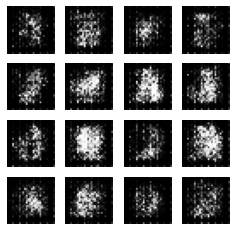

251 [D loss: 0.9999766343171359] [G loss: 1.0000886529451236]
252 [D loss: 0.9999716991223977] [G loss: 1.0000839461863507]
253 [D loss: 0.9999717102473369] [G loss: 1.0000807519536465]
254 [D loss: 0.9999642035581928] [G loss: 1.0000831871002447]
255 [D loss: 0.9999660597750335] [G loss: 1.0000883989050635]
256 [D loss: 0.9999793717870489] [G loss: 1.0000902205938473]
257 [D loss: 0.9999854620691622] [G loss: 1.000086133775767]
258 [D loss: 0.9999680926011933] [G loss: 1.0000694151749485]
259 [D loss: 0.9999704574875068] [G loss: 1.0000860327854753]
260 [D loss: 0.9999780320285936] [G loss: 1.00006207266415]
261 [D loss: 0.9999695321821491] [G loss: 1.0000741826515878]
262 [D loss: 0.9999847647741262] [G loss: 1.0000710766908014]
263 [D loss: 0.9999762245861348] [G loss: 1.000064000574639]
264 [D loss: 0.9999663104026695] [G loss: 1.0000834667589515]
265 [D loss: 0.9999696984814364] [G loss: 1.0000684674305376]
266 [D loss: 0.9999579256837023] [G loss: 1.000086256317445]
267 [D loss: 

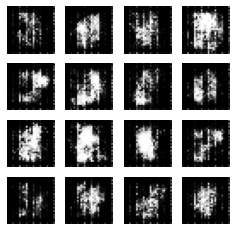

301 [D loss: 0.9999767845438328] [G loss: 1.0000605787608947]
302 [D loss: 0.9999754668060632] [G loss: 1.0000586429232499]
303 [D loss: 0.9999739233244327] [G loss: 1.0000601465544605]
304 [D loss: 0.9999752935909783] [G loss: 1.0000850764336064]
305 [D loss: 0.9999818597134436] [G loss: 1.0000577692553634]
306 [D loss: 0.9999701446395193] [G loss: 1.0000612334988546]
307 [D loss: 0.999987474304362] [G loss: 1.0000480819871882]
308 [D loss: 0.9999841823446332] [G loss: 1.000061406462919]
309 [D loss: 0.9999779997015139] [G loss: 1.000054400137742]
310 [D loss: 0.9999849216037546] [G loss: 1.0000501622489537]
311 [D loss: 0.9999664289061911] [G loss: 1.0000551232624275]
312 [D loss: 0.9999757955156383] [G loss: 1.0000761328119552]
313 [D loss: 0.9999690497461415] [G loss: 1.000065444080974]
314 [D loss: 0.9999802433740115] [G loss: 1.0000621567014605]
315 [D loss: 0.999966562478221] [G loss: 1.0000559642103326]
316 [D loss: 0.99997443292159] [G loss: 1.0000694656482665]
317 [D loss: 0.

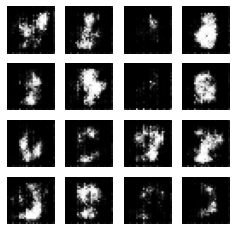

351 [D loss: 0.9999727125614299] [G loss: 1.0000549710530322]
352 [D loss: 0.9999663686176063] [G loss: 1.0000807747564977]
353 [D loss: 0.9999814533657627] [G loss: 1.0000574288787902]
354 [D loss: 0.9999652758051525] [G loss: 1.0000567799543205]
355 [D loss: 0.999968538813846] [G loss: 1.000062090017309]
356 [D loss: 0.999958928068736] [G loss: 1.0000675468618283]
357 [D loss: 0.9999678319582017] [G loss: 1.0000676683994243]
358 [D loss: 0.9999735034143669] [G loss: 1.0000553843528905]
359 [D loss: 0.9999872242042329] [G loss: 1.0000539649627171]
360 [D loss: 0.9999678097410651] [G loss: 1.000061282844399]
361 [D loss: 0.9999752157746116] [G loss: 1.0000534429491381]
362 [D loss: 0.9999781446458655] [G loss: 1.0000510379904881]
363 [D loss: 0.9999629825251759] [G loss: 1.0000572836179344]
364 [D loss: 0.999972670499119] [G loss: 1.0000499858397234]
365 [D loss: 0.9999743296684755] [G loss: 1.0000525097930222]
366 [D loss: 0.9999619842892571] [G loss: 1.000065256972448]
367 [D loss: 0

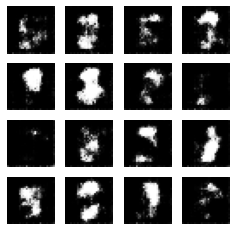

401 [D loss: 0.9999749613889435] [G loss: 1.0000593167060288]
402 [D loss: 0.9999640627338522] [G loss: 1.0000479094596813]
403 [D loss: 0.9999727727226855] [G loss: 1.0000448759528808]
404 [D loss: 0.9999666645671823] [G loss: 1.0000664638500893]
405 [D loss: 0.9999715720878157] [G loss: 1.000057994038798]
406 [D loss: 0.99997400995926] [G loss: 1.0000525490067957]
407 [D loss: 0.999974242564349] [G loss: 1.0000548218304175]
408 [D loss: 0.999972074831021] [G loss: 1.0000658382850816]
409 [D loss: 0.9999649089077138] [G loss: 1.000062172905018]
410 [D loss: 0.9999711772725277] [G loss: 1.0000626563487458]
411 [D loss: 0.9999721367275924] [G loss: 1.0000647314009257]
412 [D loss: 0.9999724266235717] [G loss: 1.000065814354457]
413 [D loss: 0.999977881070663] [G loss: 1.0000448615464848]
414 [D loss: 0.9999709828844061] [G loss: 1.0000628274356131]
415 [D loss: 0.9999912454768491] [G loss: 1.0000436522022937]
416 [D loss: 0.9999796243537276] [G loss: 1.0000403580670536]
417 [D loss: 0.9

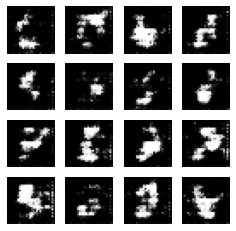

451 [D loss: 0.9999825529157533] [G loss: 1.0000287955863314]
452 [D loss: 0.9999917729437584] [G loss: 1.0000363417420886]
453 [D loss: 0.9999763873856864] [G loss: 1.0000367377724615]
454 [D loss: 0.9999810527806403] [G loss: 1.000049244677939]
455 [D loss: 0.9999745598033769] [G loss: 1.0000402626465075]
456 [D loss: 0.9999729315422883] [G loss: 1.0000453259126516]
457 [D loss: 0.999979057625751] [G loss: 1.0000278899206023]
458 [D loss: 0.9999908835197857] [G loss: 1.0000536305560672]
459 [D loss: 0.9999879610149947] [G loss: 1.0000491937498737]
460 [D loss: 0.9999826819221198] [G loss: 1.0000500287460454]
461 [D loss: 0.999968399068166] [G loss: 1.000059440091718]
462 [D loss: 0.9999814467337274] [G loss: 1.0000330967377522]
463 [D loss: 0.9999782538943691] [G loss: 1.000057209006627]
464 [D loss: 0.9999776353106427] [G loss: 1.0000508262237418]
465 [D loss: 0.9999739726481494] [G loss: 1.000064028383349]
466 [D loss: 0.9999880973009567] [G loss: 1.0000454670662293]
467 [D loss: 0

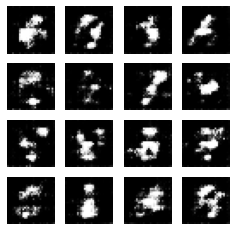

501 [D loss: 0.9999749299167888] [G loss: 1.0000725650170352]
502 [D loss: 0.9999764169479022] [G loss: 1.00005151386722]
503 [D loss: 0.9999715813755756] [G loss: 1.0000586518799537]
504 [D loss: 0.9999727294634795] [G loss: 1.0000662273305352]
505 [D loss: 0.9999692119963584] [G loss: 1.0000487865654577]
506 [D loss: 0.9999760130449431] [G loss: 1.0000731281761546]
507 [D loss: 0.9999685384646] [G loss: 1.0000543372298125]
508 [D loss: 0.9999767814406368] [G loss: 1.0000668175780447]
509 [D loss: 0.9999896939370956] [G loss: 1.000048199075536]
510 [D loss: 0.9999761604922242] [G loss: 1.0000522032351]
511 [D loss: 0.9999801971789566] [G loss: 1.0000429415595136]
512 [D loss: 0.9999751398099761] [G loss: 1.0000510786194354]
513 [D loss: 0.9999734097364126] [G loss: 1.000042532235966]
514 [D loss: 0.9999763017112855] [G loss: 1.0000464112854388]
515 [D loss: 0.9999818332616996] [G loss: 1.000045684450015]
516 [D loss: 0.9999699797772337] [G loss: 1.0000531161676918]
517 [D loss: 0.9999

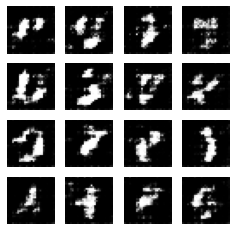

551 [D loss: 0.9999740068597021] [G loss: 1.0000488925434183]
552 [D loss: 0.9999710521879024] [G loss: 1.0000644404208288]
553 [D loss: 0.9999713508877903] [G loss: 1.0000297146252706]
554 [D loss: 0.9999552084827883] [G loss: 1.000062500614149]
555 [D loss: 0.9999564976351394] [G loss: 1.0000693793408573]
556 [D loss: 0.9999720228079241] [G loss: 1.0000509094606969]
557 [D loss: 0.999974410617142] [G loss: 1.0000656281627016]
558 [D loss: 0.9999663303424313] [G loss: 1.000048345333198]
559 [D loss: 0.9999776527438371] [G loss: 1.0000326137669617]
560 [D loss: 0.9999631058417435] [G loss: 1.0000504194576934]
561 [D loss: 0.9999742241561762] [G loss: 1.0000345624866895]
562 [D loss: 0.9999753082884126] [G loss: 1.000051289331168]
563 [D loss: 0.9999706238268118] [G loss: 1.0000565675036341]
564 [D loss: 0.9999637568253092] [G loss: 1.000043857475248]
565 [D loss: 0.9999642233597115] [G loss: 1.0000658686767565]
566 [D loss: 0.9999774423959025] [G loss: 1.0000564944566577]
567 [D loss: 

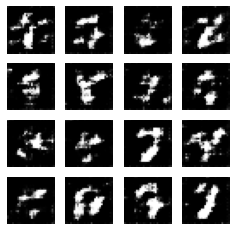

601 [D loss: 0.9999688813913963] [G loss: 1.0000691355089657]
602 [D loss: 0.9999764399253763] [G loss: 1.0000751563638914]
603 [D loss: 0.9999762694424135] [G loss: 1.0000614717209828]
604 [D loss: 0.9999706828821218] [G loss: 1.0000624080712441]
605 [D loss: 0.9999685619623051] [G loss: 1.000068935143645]
606 [D loss: 0.9999706506241637] [G loss: 1.0000553115678485]
607 [D loss: 0.9999762280203868] [G loss: 1.0000566338749195]
608 [D loss: 0.9999729234732513] [G loss: 1.0000485785021738]
609 [D loss: 0.9999684480426367] [G loss: 1.0000637050543446]
610 [D loss: 0.999974005662807] [G loss: 1.0000573869110667]
611 [D loss: 0.9999802239763085] [G loss: 1.0000578389153816]
612 [D loss: 0.9999600345545332] [G loss: 1.0000648681234452]
613 [D loss: 0.9999620776070515] [G loss: 1.0000489659651066]
614 [D loss: 0.9999699662002968] [G loss: 1.0000572410208406]
615 [D loss: 0.9999651534089935] [G loss: 1.0000506840988237]
616 [D loss: 0.9999735323435743] [G loss: 1.0000557333296456]
617 [D los

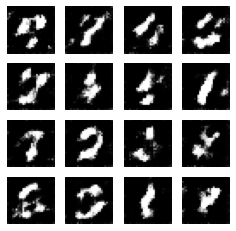

651 [D loss: 0.9999745661843917] [G loss: 1.0000535065664735]
652 [D loss: 0.9999693320169172] [G loss: 1.0000504189447383]
653 [D loss: 0.9999759328493383] [G loss: 1.0000548580719624]
654 [D loss: 0.999967712781654] [G loss: 1.0000528041746293]
655 [D loss: 0.9999688626230636] [G loss: 1.0000461102172267]
656 [D loss: 0.9999652044680261] [G loss: 1.0000674851471558]
657 [D loss: 0.9999722491775174] [G loss: 1.000060172395024]
658 [D loss: 0.9999677214545954] [G loss: 1.0000678051583236]
659 [D loss: 0.9999693449099141] [G loss: 1.000048030364269]
660 [D loss: 0.9999761466315249] [G loss: 1.0000519836430612]
661 [D loss: 0.9999662006957806] [G loss: 1.0000674366456224]
662 [D loss: 0.999975967231876] [G loss: 1.0000601234933129]
663 [D loss: 0.9999618073525198] [G loss: 1.0000561371052754]
664 [D loss: 0.9999743759872217] [G loss: 1.0000334150863637]
665 [D loss: 0.9999679919310438] [G loss: 1.0000583644105063]
666 [D loss: 0.9999622247887601] [G loss: 1.000076520285802]
667 [D loss: 

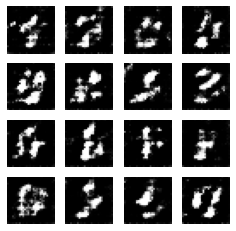

701 [D loss: 0.999965262330079] [G loss: 1.0000585872548982]
702 [D loss: 0.9999759606944281] [G loss: 1.000065135449404]
703 [D loss: 0.9999709315161454] [G loss: 1.0000609400085523]
704 [D loss: 0.9999736327699793] [G loss: 1.0000530100769538]
705 [D loss: 0.9999626023436576] [G loss: 1.000056444943766]
706 [D loss: 0.9999684911817894] [G loss: 1.00004824853022]
707 [D loss: 0.9999779872996442] [G loss: 1.0000614531818428]
708 [D loss: 0.9999695572041674] [G loss: 1.0000618384219706]
709 [D loss: 0.9999665404975531] [G loss: 1.0000567519418837]
710 [D loss: 0.9999740995845059] [G loss: 1.000068396991992]
711 [D loss: 0.9999720205596532] [G loss: 1.0000658876670059]
712 [D loss: 0.999966216939356] [G loss: 1.0000719341624063]
713 [D loss: 0.999971630575601] [G loss: 1.0000534157152288]
714 [D loss: 0.9999652948463336] [G loss: 1.000067449931521]
715 [D loss: 0.9999690219956392] [G loss: 1.000064505438786]
716 [D loss: 0.9999706622693338] [G loss: 1.0000651509617455]
717 [D loss: 0.999

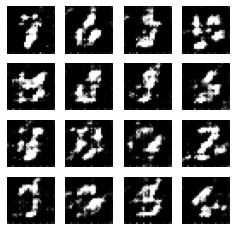

751 [D loss: 0.9999695944788982] [G loss: 1.0000586350797676]
752 [D loss: 0.9999687644449295] [G loss: 1.0000530128600076]
753 [D loss: 0.9999719642437412] [G loss: 1.0000709902087692]
754 [D loss: 0.9999698253450333] [G loss: 1.000066940789111]
755 [D loss: 0.9999722486973042] [G loss: 1.0000655478579574]
756 [D loss: 0.9999758245539851] [G loss: 1.0000636111508356]
757 [D loss: 0.9999748034315417] [G loss: 1.0000678807118675]
758 [D loss: 0.999971619254211] [G loss: 1.0000631618313491]
759 [D loss: 0.9999599339025735] [G loss: 1.000060722552007]
760 [D loss: 0.99997069004894] [G loss: 1.000072633221862]
761 [D loss: 0.9999667545889679] [G loss: 1.0000666251435177]
762 [D loss: 0.9999693627105444] [G loss: 1.0000519971508766]
763 [D loss: 0.9999673894017178] [G loss: 1.000051534807426]
764 [D loss: 0.999975864229782] [G loss: 1.0000628603884252]
765 [D loss: 0.99996941426798] [G loss: 1.000056701945141]
766 [D loss: 0.999962563491863] [G loss: 1.0000486396602355]
767 [D loss: 0.99996

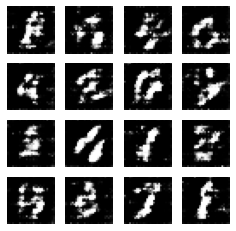

801 [D loss: 0.9999775564756419] [G loss: 1.0000582190368732]
802 [D loss: 0.9999678844178561] [G loss: 1.0000675610208418]
803 [D loss: 0.9999672410849598] [G loss: 1.0000631611328572]
804 [D loss: 0.9999765100328659] [G loss: 1.0000655095791444]
805 [D loss: 0.9999755435419502] [G loss: 1.000059496724134]
806 [D loss: 0.9999746240609966] [G loss: 1.000060136160755]
807 [D loss: 0.9999606192068313] [G loss: 1.0000750510007492]
808 [D loss: 0.9999733491749794] [G loss: 1.0000608130067121]
809 [D loss: 0.9999770315844216] [G loss: 1.0000660040604998]
810 [D loss: 0.9999736863246653] [G loss: 1.0000647179185762]
811 [D loss: 0.9999704224028392] [G loss: 1.0000686048297212]
812 [D loss: 0.9999712069839006] [G loss: 1.000066610497015]
813 [D loss: 0.9999627095567121] [G loss: 1.0000725856807549]
814 [D loss: 0.9999709900985181] [G loss: 1.0000695159760653]
815 [D loss: 0.9999746146568214] [G loss: 1.000065121697844]
816 [D loss: 0.9999590097595501] [G loss: 1.0000570761985728]
817 [D loss:

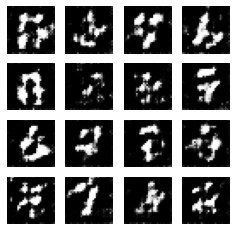

851 [D loss: 0.9999747883084638] [G loss: 1.0000640478392597]
852 [D loss: 0.9999640879395884] [G loss: 1.000062987113779]
853 [D loss: 0.9999684802423872] [G loss: 1.000063918036176]
854 [D loss: 0.9999665042778361] [G loss: 1.0000697430077707]
855 [D loss: 0.9999685120128561] [G loss: 1.0000696600036463]
856 [D loss: 0.9999736063655291] [G loss: 1.000060555037635]
857 [D loss: 0.9999705825794081] [G loss: 1.0000651874725008]
858 [D loss: 0.999973028927343] [G loss: 1.0000613649535808]
859 [D loss: 0.9999781694714329] [G loss: 1.000059963138483]
860 [D loss: 0.9999614136031596] [G loss: 1.0000522008958797]
861 [D loss: 0.9999753034353489] [G loss: 1.000063288869569]
862 [D loss: 0.9999622860450472] [G loss: 1.0000628928173683]
863 [D loss: 0.9999704887413827] [G loss: 1.000059256417444]
864 [D loss: 0.9999707387360104] [G loss: 1.00006594430306]
865 [D loss: 0.9999694969737902] [G loss: 1.0000702854886185]
866 [D loss: 0.9999747431720607] [G loss: 1.0000714565248927]
867 [D loss: 0.99

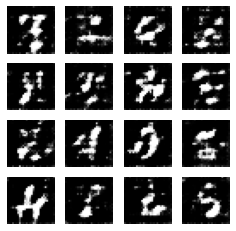

901 [D loss: 0.9999735176752438] [G loss: 1.000062970619183]
902 [D loss: 0.9999638945591869] [G loss: 1.0000591902062297]
903 [D loss: 0.9999579799514322] [G loss: 1.0000613720621914]
904 [D loss: 0.9999735997189418] [G loss: 1.000065568718128]
905 [D loss: 0.9999639322559233] [G loss: 1.0000657478376525]
906 [D loss: 0.9999644760573574] [G loss: 1.0000686276034685]
907 [D loss: 0.9999687742056267] [G loss: 1.0000676515919622]
908 [D loss: 0.9999696258819313] [G loss: 1.0000691516324878]
909 [D loss: 0.9999720369087299] [G loss: 1.0000688579457346]
910 [D loss: 0.9999688185635023] [G loss: 1.000067173561547]
911 [D loss: 0.9999709244730184] [G loss: 1.0000721747492207]
912 [D loss: 0.9999673566017009] [G loss: 1.0000660173755023]
913 [D loss: 0.9999777877346787] [G loss: 1.0000598532496952]
914 [D loss: 0.9999695498263463] [G loss: 1.0000578819963266]
915 [D loss: 0.9999731434872956] [G loss: 1.0000576843922317]
916 [D loss: 0.9999631272639817] [G loss: 1.0000680838202243]
917 [D loss

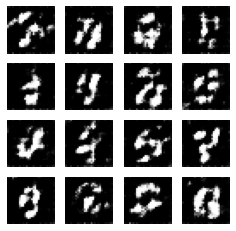

951 [D loss: 0.999976735067321] [G loss: 1.0000488666519232]
952 [D loss: 0.9999704657457187] [G loss: 1.0000564105430385]
953 [D loss: 0.9999763524465379] [G loss: 1.0000587093782087]
954 [D loss: 0.9999699696745665] [G loss: 1.0000730614192435]
955 [D loss: 0.9999771155853523] [G loss: 1.0000506362921442]
956 [D loss: 0.9999809565197211] [G loss: 1.0000507066142745]
957 [D loss: 0.9999724158988101] [G loss: 1.0000703433033777]
958 [D loss: 0.9999679037991882] [G loss: 1.0000568803297938]
959 [D loss: 0.9999641948670615] [G loss: 1.0000522149930475]
960 [D loss: 0.9999651788184565] [G loss: 1.00006231230509]
961 [D loss: 0.9999719741681474] [G loss: 1.0000563275025343]
962 [D loss: 0.999956978692353] [G loss: 1.0000628910129308]
963 [D loss: 0.9999672761769034] [G loss: 1.0000496922220918]
964 [D loss: 0.9999647437525709] [G loss: 1.0000574555815547]
965 [D loss: 0.9999643978735548] [G loss: 1.0000662562524667]
966 [D loss: 0.9999656047330063] [G loss: 1.000060347148974]
967 [D loss: 

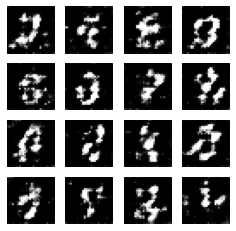

1001 [D loss: 0.9999720426822023] [G loss: 1.0000603099251748]
1002 [D loss: 0.9999633295446984] [G loss: 1.0000650829897495]
1003 [D loss: 0.9999767348526802] [G loss: 1.0000638798737782]
1004 [D loss: 0.9999675817161915] [G loss: 1.0000773231877247]
1005 [D loss: 0.9999693800491514] [G loss: 1.0000645570835331]
1006 [D loss: 0.9999709886433266] [G loss: 1.0000700853925082]
1007 [D loss: 0.9999704287620261] [G loss: 1.0000584806075494]
1008 [D loss: 0.9999645026109647] [G loss: 1.000057810710132]
1009 [D loss: 0.9999615930428263] [G loss: 1.0000646353437332]
1010 [D loss: 0.999969018605043] [G loss: 1.0000681336096022]
1011 [D loss: 0.9999750112256152] [G loss: 1.000064812527853]
1012 [D loss: 0.9999655267674825] [G loss: 1.0000703890109435]
1013 [D loss: 0.999966787701851] [G loss: 1.0000656198972138]
1014 [D loss: 0.9999753194824734] [G loss: 1.0000673059694236]
1015 [D loss: 0.9999680369619455] [G loss: 1.0000635056276224]
1016 [D loss: 0.999971489138261] [G loss: 1.000075043113611

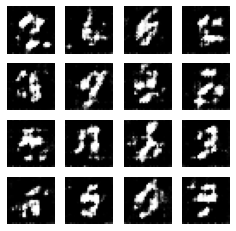

1051 [D loss: 0.9999785315994814] [G loss: 1.0000582677530474]
1052 [D loss: 0.9999614484040649] [G loss: 1.0000648300847388]
1053 [D loss: 0.9999696853010391] [G loss: 1.0000568936375203]
1054 [D loss: 0.999976428473019] [G loss: 1.0000590161107539]
1055 [D loss: 0.9999687638919568] [G loss: 1.0000658638819004]
1056 [D loss: 0.9999694963917136] [G loss: 1.0000534738283022]
1057 [D loss: 0.9999792700655235] [G loss: 1.0000626968540018]
1058 [D loss: 0.9999688392636017] [G loss: 1.000060652015236]
1059 [D loss: 0.9999770361173432] [G loss: 1.0000585610614507]
1060 [D loss: 0.9999658181150153] [G loss: 1.0000586770293012]
1061 [D loss: 0.9999733729819127] [G loss: 1.0000606205067015]
1062 [D loss: 0.9999812355526956] [G loss: 1.0000543497299077]
1063 [D loss: 0.9999716796482971] [G loss: 1.0000562071327295]
1064 [D loss: 0.9999737363978056] [G loss: 1.0000697689829394]
1065 [D loss: 0.999974782782374] [G loss: 1.0000441289157607]
1066 [D loss: 0.9999726381611254] [G loss: 1.0000487174547

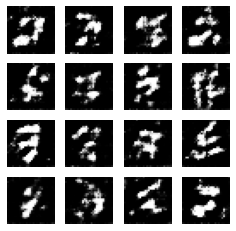

1101 [D loss: 0.999968991131027] [G loss: 1.0000634077077848]
1102 [D loss: 0.9999731632415205] [G loss: 1.000068109635322]
1103 [D loss: 0.9999704073889006] [G loss: 1.000062296006945]
1104 [D loss: 0.9999731754760433] [G loss: 1.0000622599254712]
1105 [D loss: 0.999976373728714] [G loss: 1.0000594173325226]
1106 [D loss: 0.9999723578075645] [G loss: 1.0000712227410986]
1107 [D loss: 0.9999741284300399] [G loss: 1.0000588378497923]
1108 [D loss: 0.9999670364086342] [G loss: 1.0000606676039752]
1109 [D loss: 0.9999804169710842] [G loss: 1.0000698987787473]
1110 [D loss: 0.9999687428171455] [G loss: 1.0000765095610404]
1111 [D loss: 0.9999624738084094] [G loss: 1.0000673408867442]
1112 [D loss: 0.9999645026218786] [G loss: 1.00006710607704]
1113 [D loss: 0.9999717141981819] [G loss: 1.0000545699804206]
1114 [D loss: 0.9999745992427052] [G loss: 1.0000659889701637]
1115 [D loss: 0.9999703342291468] [G loss: 1.0000731620093575]
1116 [D loss: 0.9999706571616116] [G loss: 1.0000634052266832

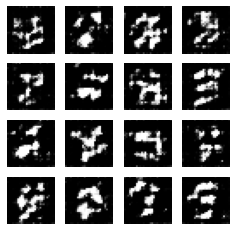

1151 [D loss: 0.9999760674181744] [G loss: 1.0000678937503835]
1152 [D loss: 0.9999810539447935] [G loss: 1.0000472800529678]
1153 [D loss: 0.9999722944157838] [G loss: 1.0000598492988502]
1154 [D loss: 0.9999708015493525] [G loss: 1.0000576056409045]
1155 [D loss: 0.9999688013849664] [G loss: 1.00005383676762]
1156 [D loss: 0.9999677086343581] [G loss: 1.0000701141689206]
1157 [D loss: 0.9999651597390766] [G loss: 1.0000554205907974]
1158 [D loss: 0.9999657849948562] [G loss: 1.000064579769969]
1159 [D loss: 0.9999778344390506] [G loss: 1.00005238140875]
1160 [D loss: 0.9999659568948118] [G loss: 1.0000619505735813]
1161 [D loss: 0.9999674738028261] [G loss: 1.000061610378907]
1162 [D loss: 0.9999708686264057] [G loss: 1.0000693708570907]
1163 [D loss: 0.9999707191309426] [G loss: 1.0000666141713737]
1164 [D loss: 0.9999680459877709] [G loss: 1.0000540050314157]
1165 [D loss: 0.999969349379171] [G loss: 1.0000638183410047]
1166 [D loss: 0.999969836379023] [G loss: 1.0000689094740665]


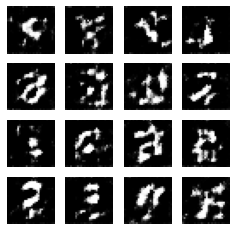

1201 [D loss: 0.999966282666719] [G loss: 1.000057796431065]
1202 [D loss: 0.9999699969739595] [G loss: 1.0000667204440106]
1203 [D loss: 0.9999688401076128] [G loss: 1.0000612440053374]
1204 [D loss: 0.999972091143718] [G loss: 1.0000552282072022]
1205 [D loss: 0.9999681974477426] [G loss: 1.0000614589080215]
1206 [D loss: 0.9999693993522669] [G loss: 1.0000706119317329]
1207 [D loss: 0.9999671691948606] [G loss: 1.0000638695637463]
1208 [D loss: 0.9999717066093581] [G loss: 1.0000745386641938]
1209 [D loss: 0.9999668566961191] [G loss: 1.00006405775639]
1210 [D loss: 0.9999729097471572] [G loss: 1.0000502701004734]
1211 [D loss: 0.9999697258681408] [G loss: 1.0000689370790496]
1212 [D loss: 0.999973457903252] [G loss: 1.0000690943707014]
1213 [D loss: 0.9999713583019911] [G loss: 1.0000638055353193]
1214 [D loss: 0.9999698773390264] [G loss: 1.0000677387870383]
1215 [D loss: 0.9999777191223984] [G loss: 1.000055038017308]
1216 [D loss: 0.9999677556588722] [G loss: 1.0000605602726864]

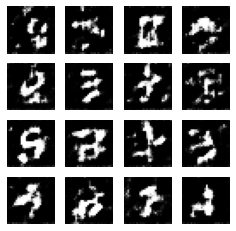

1251 [D loss: 0.9999694050275139] [G loss: 1.0000654624745948]
1252 [D loss: 0.999969733042235] [G loss: 1.0000590561539866]
1253 [D loss: 0.9999734200609964] [G loss: 1.000061119601014]
1254 [D loss: 0.9999752704497951] [G loss: 1.00005866385618]
1255 [D loss: 0.9999636392149114] [G loss: 1.0000653331226204]
1256 [D loss: 0.999967360879964] [G loss: 1.000055360924307]
1257 [D loss: 0.9999719561164966] [G loss: 1.0000627344852546]
1258 [D loss: 0.9999659314489691] [G loss: 1.000071778500569]
1259 [D loss: 0.9999699631371186] [G loss: 1.0000719502713764]
1260 [D loss: 0.9999701044143876] [G loss: 1.0000591577481828]
1261 [D loss: 0.9999675686121918] [G loss: 1.0000615265162196]
1262 [D loss: 0.9999663757262169] [G loss: 1.00005971336941]
1263 [D loss: 0.9999642836774001] [G loss: 1.000060416648921]
1264 [D loss: 0.9999687224262743] [G loss: 1.0000501634858665]
1265 [D loss: 0.999972788944433] [G loss: 1.000060200702137]
1266 [D loss: 0.9999699905492889] [G loss: 1.0000620428763796]
1267

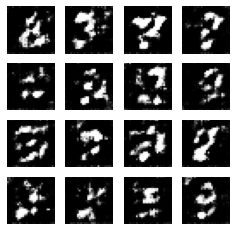

1301 [D loss: 0.9999708006253059] [G loss: 1.000061260558141]
1302 [D loss: 0.9999718346698501] [G loss: 1.0000616334145889]
1303 [D loss: 0.9999710830670665] [G loss: 1.0000745849538362]
1304 [D loss: 0.9999683641872252] [G loss: 1.0000695040871506]
1305 [D loss: 0.9999723327273387] [G loss: 1.0000696030911058]
1306 [D loss: 0.9999734380253358] [G loss: 1.0000636317563476]
1307 [D loss: 0.9999694451835239] [G loss: 1.0000677368079778]
1308 [D loss: 0.9999732681608293] [G loss: 1.0000679594813846]
1309 [D loss: 0.9999767334702483] [G loss: 1.0000693039182806]
1310 [D loss: 0.9999659678796888] [G loss: 1.0000583274268138]
1311 [D loss: 0.999967690797348] [G loss: 1.0000723049379303]
1312 [D loss: 0.9999673399943276] [G loss: 1.000070975642302]
1313 [D loss: 0.9999716977181379] [G loss: 1.000065032596467]
1314 [D loss: 0.9999745760651422] [G loss: 1.000059325782786]
1315 [D loss: 0.9999770217109472] [G loss: 1.0000533858692506]
1316 [D loss: 0.9999775060423417] [G loss: 1.000062339655414

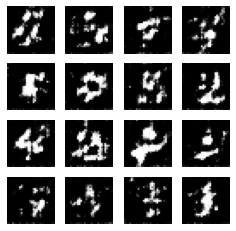

1351 [D loss: 0.9999751394607301] [G loss: 1.000056566499552]
1352 [D loss: 0.9999647872427886] [G loss: 1.000069260953751]
1353 [D loss: 0.9999757154801046] [G loss: 1.0000681089077261]
1354 [D loss: 0.9999817060815985] [G loss: 1.0000668135471642]
1355 [D loss: 0.99997676852945] [G loss: 1.0000692821340635]
1356 [D loss: 0.9999682684610889] [G loss: 1.00006791290798]
1357 [D loss: 0.9999738730984973] [G loss: 1.0000675051051076]
1358 [D loss: 0.9999627159704687] [G loss: 1.0000580178384553]
1359 [D loss: 0.9999701735905546] [G loss: 1.0000647861888865]
1360 [D loss: 0.9999734787779744] [G loss: 1.000068258450483]
1361 [D loss: 0.9999622468749294] [G loss: 1.0000713041517884]
1362 [D loss: 0.9999653757604392] [G loss: 1.000065518761403]
1363 [D loss: 0.9999696077156841] [G loss: 1.0000587178765272]
1364 [D loss: 0.9999677079213143] [G loss: 1.0000582881111768]
1365 [D loss: 0.9999775796641188] [G loss: 1.0000538724343642]
1366 [D loss: 0.9999601385825372] [G loss: 1.0000604082233622]


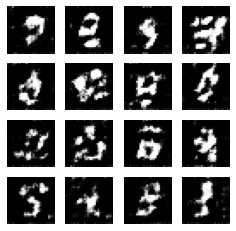

1401 [D loss: 0.9999659362401871] [G loss: 1.000070563502959]
1402 [D loss: 0.9999719092411397] [G loss: 1.0000667709537083]
1403 [D loss: 0.9999663910894014] [G loss: 1.0000515919928148]
1404 [D loss: 0.9999706770431658] [G loss: 1.0000573586585233]
1405 [D loss: 0.9999731308053015] [G loss: 1.000059733290982]
1406 [D loss: 0.9999648030752724] [G loss: 1.0000638893252471]
1407 [D loss: 0.9999674971404602] [G loss: 1.0000773115170887]
1408 [D loss: 0.9999624665251758] [G loss: 1.000060025460698]
1409 [D loss: 0.9999656491745554] [G loss: 1.0000728673257981]
1410 [D loss: 0.9999718532344559] [G loss: 1.0000628866328043]
1411 [D loss: 0.9999667604424758] [G loss: 1.000068257759267]
1412 [D loss: 0.9999666128423996] [G loss: 1.0000624813183094]
1413 [D loss: 0.9999727998583694] [G loss: 1.0000694354966981]
1414 [D loss: 0.999973670921463] [G loss: 1.0000698710500728]
1415 [D loss: 0.999974583137373] [G loss: 1.0000605395252933]
1416 [D loss: 0.9999667390366085] [G loss: 1.000061449376517]

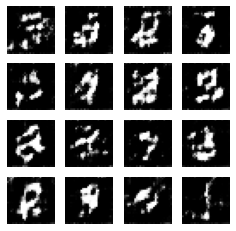

1451 [D loss: 0.9999719978222856] [G loss: 1.0000611265713815]
1452 [D loss: 0.9999633737788827] [G loss: 1.0000660288933432]
1453 [D loss: 0.9999628565365128] [G loss: 1.0000572410681343]
1454 [D loss: 0.9999684720714868] [G loss: 1.000070201473136]
1455 [D loss: 0.9999665957038815] [G loss: 1.0000670155350235]
1456 [D loss: 0.999968334363075] [G loss: 1.000071619739174]
1457 [D loss: 0.9999690507938794] [G loss: 1.000065702079155]
1458 [D loss: 0.9999694180660299] [G loss: 1.0000559884902032]
1459 [D loss: 0.9999691035263822] [G loss: 1.0000587884169363]
1460 [D loss: 0.9999727185349911] [G loss: 1.000053770148952]
1461 [D loss: 0.9999681003464502] [G loss: 1.000064003863372]
1462 [D loss: 0.9999605695338687] [G loss: 1.0000682124664309]
1463 [D loss: 0.9999669685712433] [G loss: 1.0000694553018548]
1464 [D loss: 0.9999617374196532] [G loss: 1.0000580891719437]
1465 [D loss: 0.9999681418739783] [G loss: 1.000054434993217]
1466 [D loss: 0.9999687860399717] [G loss: 1.0000646023108857]

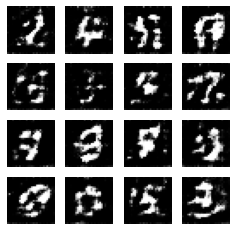

1501 [D loss: 0.999980732005497] [G loss: 1.0000564293804928]
1502 [D loss: 0.999961245302984] [G loss: 1.000063568499172]
1503 [D loss: 0.9999659786535631] [G loss: 1.0000650657893857]
1504 [D loss: 0.9999648013617843] [G loss: 1.0000623647938482]
1505 [D loss: 0.9999742776672065] [G loss: 1.0000663846585667]
1506 [D loss: 0.9999639045763615] [G loss: 1.0000578539948037]
1507 [D loss: 0.9999672920566809] [G loss: 1.000071801841841]
1508 [D loss: 0.999968799726048] [G loss: 1.0000695303315297]
1509 [D loss: 0.9999696627382946] [G loss: 1.0000653887691442]
1510 [D loss: 0.9999723116889072] [G loss: 1.000065324100433]
1511 [D loss: 0.999966830437188] [G loss: 1.0000531225668965]
1512 [D loss: 0.9999670844772481] [G loss: 1.0000727929291315]
1513 [D loss: 0.9999743765074527] [G loss: 1.00006468466745]
1514 [D loss: 0.9999718986546213] [G loss: 1.0000708055886207]
1515 [D loss: 0.9999698496831115] [G loss: 1.0000736129877623]
1516 [D loss: 0.9999817764255567] [G loss: 1.0000628586203675]
1

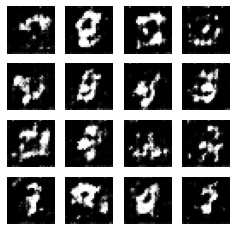

1551 [D loss: 0.9999656103791494] [G loss: 1.0000577981263632]
1552 [D loss: 0.999968887106661] [G loss: 1.000067719942308]
1553 [D loss: 0.9999646164233127] [G loss: 1.0000598267724854]
1554 [D loss: 0.9999727100148448] [G loss: 1.0000765068107285]
1555 [D loss: 0.999968790623825] [G loss: 1.0000668879511068]
1556 [D loss: 0.9999718160761404] [G loss: 1.0000576545207878]
1557 [D loss: 0.9999744568085589] [G loss: 1.0000813366859802]
1558 [D loss: 0.9999651707621524] [G loss: 1.0000714033958502]
1559 [D loss: 0.9999664950446459] [G loss: 1.0000629494243185]
1560 [D loss: 0.9999684564681957] [G loss: 1.000061033111706]
1561 [D loss: 0.9999638958615833] [G loss: 1.0000723404518794]
1562 [D loss: 0.9999695717524446] [G loss: 1.0000657114724163]
1563 [D loss: 0.9999766078763059] [G loss: 1.000063972423959]
1564 [D loss: 0.9999740964631201] [G loss: 1.0000619474449195]
1565 [D loss: 0.9999710102783865] [G loss: 1.0000631109724054]
1566 [D loss: 0.9999641995382262] [G loss: 1.000057400233345

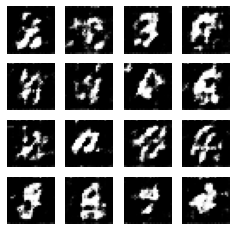

1601 [D loss: 0.9999732563119323] [G loss: 1.0000611561408732]
1602 [D loss: 0.9999665197119612] [G loss: 1.000069588313636]
1603 [D loss: 0.9999700085900258] [G loss: 1.0000725419740775]
1604 [D loss: 0.9999666387338948] [G loss: 1.0000687354040565]
1605 [D loss: 0.9999687500421715] [G loss: 1.0000608686932537]
1606 [D loss: 0.9999711025084252] [G loss: 1.0000648664645269]
1607 [D loss: 0.9999771309921925] [G loss: 1.0000686009734636]
1608 [D loss: 0.9999643186129106] [G loss: 1.0000661153317196]
1609 [D loss: 0.9999691741722927] [G loss: 1.000061209037085]
1610 [D loss: 0.9999663456110284] [G loss: 1.000065605257987]
1611 [D loss: 0.9999729227238277] [G loss: 1.0000733950146241]
1612 [D loss: 0.9999693441695854] [G loss: 1.0000595893361606]
1613 [D loss: 0.9999704652436776] [G loss: 1.0000621788421995]
1614 [D loss: 0.9999725709640188] [G loss: 1.000058798097598]
1615 [D loss: 0.9999688466341468] [G loss: 1.0000479226291645]
1616 [D loss: 0.9999697559469496] [G loss: 1.00007529972936

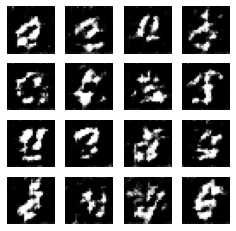

1651 [D loss: 0.9999698556712246] [G loss: 1.000062101673393]
1652 [D loss: 0.9999651908601663] [G loss: 1.00005636804417]
1653 [D loss: 0.9999689963224228] [G loss: 1.0000699694137438]
1654 [D loss: 0.9999644851413905] [G loss: 1.0000454852524854]
1655 [D loss: 0.9999658257693227] [G loss: 1.0000619394922978]
1656 [D loss: 0.9999634168816556] [G loss: 1.0000700231612427]
1657 [D loss: 0.9999737871657999] [G loss: 1.0000653353781672]
1658 [D loss: 0.999970902728819] [G loss: 1.0000672441674396]
1659 [D loss: 0.9999655748197256] [G loss: 1.0000803997318144]
1660 [D loss: 0.9999658515516785] [G loss: 1.0000688224390615]
1661 [D loss: 0.9999732685246272] [G loss: 1.000053883632063]
1662 [D loss: 0.9999667654046789] [G loss: 1.0000651384907542]
1663 [D loss: 0.9999652869355486] [G loss: 1.0000627243280178]
1664 [D loss: 0.9999716469865234] [G loss: 1.0000603638545726]
1665 [D loss: 0.9999586764570267] [G loss: 1.0000683357211528]
1666 [D loss: 0.9999659539789718] [G loss: 1.000054681055189

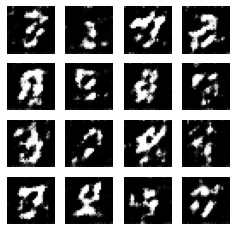

1701 [D loss: 0.999964592512697] [G loss: 1.000074298324762]
1702 [D loss: 0.9999710948941356] [G loss: 1.0000549002324988]
1703 [D loss: 0.9999688785028411] [G loss: 1.0000646410044283]
1704 [D loss: 0.9999596245743305] [G loss: 1.0000582520551689]
1705 [D loss: 0.9999715053345426] [G loss: 1.0000651424925309]
1706 [D loss: 0.9999696014456276] [G loss: 1.0000562870845897]
1707 [D loss: 0.9999712530261604] [G loss: 1.0000621057697572]
1708 [D loss: 0.9999655058272765] [G loss: 1.0000644200044917]
1709 [D loss: 0.999973778041749] [G loss: 1.0000648975983495]
1710 [D loss: 0.9999707931710873] [G loss: 1.0000623666492174]
1711 [D loss: 0.9999665919531253] [G loss: 1.0000732427142793]
1712 [D loss: 0.9999752867515781] [G loss: 1.0000653295355733]
1713 [D loss: 0.9999752753465145] [G loss: 1.0000665851330268]
1714 [D loss: 0.9999695844453527] [G loss: 1.000065023006755]
1715 [D loss: 0.9999708942632424] [G loss: 1.0000604995439062]
1716 [D loss: 0.9999750417191535] [G loss: 1.00006684737309

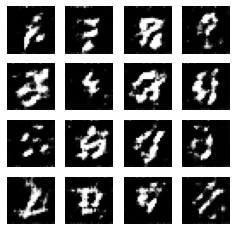

1751 [D loss: 0.9999685758084524] [G loss: 1.0000576510938117]
1752 [D loss: 0.9999726014721091] [G loss: 1.0000618804697297]
1753 [D loss: 0.9999732870710432] [G loss: 1.0000693494948791]
1754 [D loss: 0.9999762252773507] [G loss: 1.0000650444781058]
1755 [D loss: 0.999966382572893] [G loss: 1.000061081664171]
1756 [D loss: 0.9999729874907644] [G loss: 1.0000601978244958]
1757 [D loss: 0.9999699029067415] [G loss: 1.0000566410672036]
1758 [D loss: 0.9999662463742425] [G loss: 1.0000676467025187]
1759 [D loss: 0.9999670451725251] [G loss: 1.00005218539809]
1760 [D loss: 0.9999688987263653] [G loss: 1.00006718266377]
1761 [D loss: 0.9999742838735983] [G loss: 1.0000575082522118]
1762 [D loss: 0.9999712025964982] [G loss: 1.0000672561800457]
1763 [D loss: 0.9999735064629931] [G loss: 1.0000635403121123]
1764 [D loss: 0.9999673314923712] [G loss: 1.0000585055422562]
1765 [D loss: 0.9999720719715697] [G loss: 1.0000560690859857]
1766 [D loss: 0.9999774074785819] [G loss: 1.0000673839313095

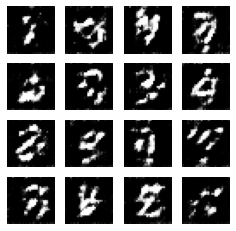

1801 [D loss: 0.999966355804645] [G loss: 1.0000581696767767]
1802 [D loss: 0.9999610613049299] [G loss: 1.0000658245626255]
1803 [D loss: 0.9999697998682677] [G loss: 1.0000691088062013]
1804 [D loss: 0.9999681532754039] [G loss: 1.0000658923527226]
1805 [D loss: 0.9999722395514254] [G loss: 1.0000586788155488]
1806 [D loss: 0.9999689672949899] [G loss: 1.0000587336326134]
1807 [D loss: 0.9999746050089016] [G loss: 1.0000694403861417]
1808 [D loss: 0.999967951554936] [G loss: 1.0000560328662687]
1809 [D loss: 0.9999647663898941] [G loss: 1.000059300029534]
1810 [D loss: 0.9999676230327168] [G loss: 1.0000685492705088]
1811 [D loss: 0.9999734686753072] [G loss: 1.000071120717621]
1812 [D loss: 0.9999708927025495] [G loss: 1.0000694718182785]
1813 [D loss: 0.9999729016890342] [G loss: 1.000071743648732]
1814 [D loss: 0.9999694233920309] [G loss: 1.000070601781772]
1815 [D loss: 0.9999685880902689] [G loss: 1.000066307024099]
1816 [D loss: 0.9999658112265024] [G loss: 1.000053994004702]


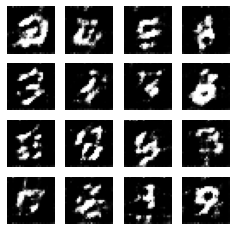

1851 [D loss: 0.9999693215886509] [G loss: 1.0000651207810733]
1852 [D loss: 0.9999609975311614] [G loss: 1.0000691587265464]
1853 [D loss: 0.9999686461633246] [G loss: 1.000052235853218]
1854 [D loss: 0.9999707505157858] [G loss: 1.0000620018981863]
1855 [D loss: 0.999970584140101] [G loss: 1.0000632510054857]
1856 [D loss: 0.9999660937228327] [G loss: 1.0000660126970615]
1857 [D loss: 0.9999715417434345] [G loss: 1.000051137045375]
1858 [D loss: 0.9999751934228698] [G loss: 1.0000668641587254]
1859 [D loss: 0.999980008797138] [G loss: 1.0000599275736022]
1860 [D loss: 0.9999684494068788] [G loss: 1.0000706331702531]
1861 [D loss: 0.9999692180790589] [G loss: 1.0000587772883591]
1862 [D loss: 0.9999675652470614] [G loss: 1.000059551657614]
1863 [D loss: 0.9999686791834392] [G loss: 1.0000611917712376]
1864 [D loss: 0.9999654107377864] [G loss: 1.0000565068403375]
1865 [D loss: 0.9999735249002697] [G loss: 1.0000593452059547]
1866 [D loss: 0.9999700078078604] [G loss: 1.000069350171543

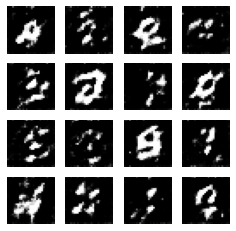

1901 [D loss: 0.9999775677715661] [G loss: 1.0000668421926093]
1902 [D loss: 0.9999737795660621] [G loss: 1.0000668550055707]
1903 [D loss: 0.9999708202740294] [G loss: 1.0000723913617549]
1904 [D loss: 0.9999687210729462] [G loss: 1.0000750271210563]
1905 [D loss: 0.9999659588720533] [G loss: 1.00007678703696]
1906 [D loss: 0.9999703683497501] [G loss: 1.0000639154022792]
1907 [D loss: 0.9999679279717384] [G loss: 1.0000650155197945]
1908 [D loss: 0.9999754342861706] [G loss: 1.000060380629293]
1909 [D loss: 0.9999703892899561] [G loss: 1.00006262918032]
1910 [D loss: 0.9999655540232197] [G loss: 1.0000595478159084]
1911 [D loss: 0.9999665022114641] [G loss: 1.00006562431372]
1912 [D loss: 0.9999693761201343] [G loss: 1.0000607727197348]
1913 [D loss: 0.9999808242901054] [G loss: 1.0000662523016217]
1914 [D loss: 0.999966156341543] [G loss: 1.0000470842642244]
1915 [D loss: 0.9999772737755848] [G loss: 1.0000483356197947]
1916 [D loss: 0.999970376426063] [G loss: 1.0000616042889305]
1

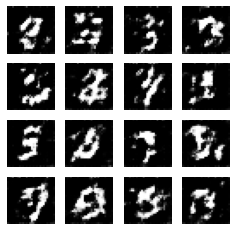

1951 [D loss: 0.9999712111966801] [G loss: 1.0000668729262543]
1952 [D loss: 0.999973868005327] [G loss: 1.0000660586592858]
1953 [D loss: 0.9999670052129659] [G loss: 1.000062780076405]
1954 [D loss: 0.9999666147814423] [G loss: 1.0000677559219184]
1955 [D loss: 0.9999713367069489] [G loss: 1.0000637098346488]
1956 [D loss: 0.9999663781636627] [G loss: 1.0000644877291052]
1957 [D loss: 0.9999617353751091] [G loss: 1.000066033724579]
1958 [D loss: 0.9999722172287875] [G loss: 1.000062323466409]
1959 [D loss: 0.9999670178331144] [G loss: 1.0000650049478281]
1960 [D loss: 0.9999693368954468] [G loss: 1.0000651189257042]
1961 [D loss: 0.9999754207310616] [G loss: 1.0000640212383587]
1962 [D loss: 0.9999689575342927] [G loss: 1.0000646670450806]
1963 [D loss: 0.999968819818605] [G loss: 1.0000570667907596]
1964 [D loss: 0.9999694131620345] [G loss: 1.0000736165675335]
1965 [D loss: 0.9999681551707909] [G loss: 1.000072182243457]
1966 [D loss: 0.9999692792443966] [G loss: 1.0000654436007608

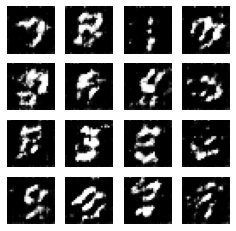

2001 [D loss: 0.9999741060382803] [G loss: 1.0000729637249606]
2002 [D loss: 0.9999672393696528] [G loss: 1.0000501284885104]
2003 [D loss: 0.9999704539222876] [G loss: 1.0000614622040302]
2004 [D loss: 0.9999755341959826] [G loss: 1.0000558284154977]
2005 [D loss: 0.9999698338433518] [G loss: 1.000067059911089]
2006 [D loss: 0.9999718299823144] [G loss: 1.000065531778091]
2007 [D loss: 0.9999650929457857] [G loss: 1.0000722920303815]
2008 [D loss: 0.9999697499279137] [G loss: 1.0000673391405144]
2009 [D loss: 0.9999665954092052] [G loss: 1.0000660844452796]
2010 [D loss: 0.9999664100760128] [G loss: 1.0000740418763598]
2011 [D loss: 0.999967559833749] [G loss: 1.0000656522170175]
2012 [D loss: 0.999975369159074] [G loss: 1.0000650467627565]
2013 [D loss: 0.999970548426063] [G loss: 1.0000573609650019]
2014 [D loss: 0.9999823436810402] [G loss: 1.0000555580954824]
2015 [D loss: 0.9999713897996116] [G loss: 1.0000710100794095]
2016 [D loss: 0.9999693906720495] [G loss: 1.000066610933572

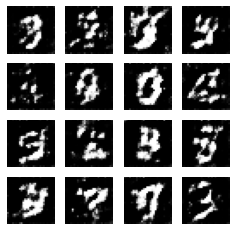

2051 [D loss: 0.9999678476160625] [G loss: 1.0000639353238512]
2052 [D loss: 0.999968720425386] [G loss: 1.0000500869282405]
2053 [D loss: 0.9999798790013301] [G loss: 1.0000607482506894]
2054 [D loss: 0.999958758296998] [G loss: 1.0000592467440583]
2055 [D loss: 0.9999682654161006] [G loss: 1.0000664021354169]
2056 [D loss: 0.9999697765706514] [G loss: 1.0000773976134951]
2057 [D loss: 0.99996599102451] [G loss: 1.0000721756587154]
2058 [D loss: 0.9999712685603299] [G loss: 1.000059610876633]
2059 [D loss: 0.9999735705714556] [G loss: 1.0000675404662616]
2060 [D loss: 0.9999692724450142] [G loss: 1.0000624911335763]
2061 [D loss: 0.9999732748219685] [G loss: 1.0000645256513963]
2062 [D loss: 0.9999693956415285] [G loss: 1.0000711307948222]
2063 [D loss: 0.9999732991782366] [G loss: 1.0000508284647367]
2064 [D loss: 0.9999678411004425] [G loss: 1.000063571431383]
2065 [D loss: 0.9999654860439477] [G loss: 1.0000454305336461]
2066 [D loss: 0.9999700937405578] [G loss: 1.00007199600077]


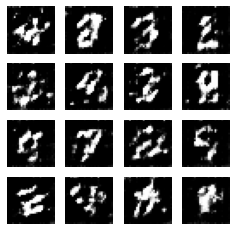

2101 [D loss: 0.9999690730946895] [G loss: 1.0000686995699652]
2102 [D loss: 0.9999710618540121] [G loss: 1.0000614468372078]
2103 [D loss: 0.9999678759158996] [G loss: 1.00005534185766]
2104 [D loss: 0.9999656726158719] [G loss: 1.000069263172918]
2105 [D loss: 0.9999714352088631] [G loss: 1.0000618283738731]
2106 [D loss: 0.9999674773862353] [G loss: 1.0000688415238983]
2107 [D loss: 0.999967482062857] [G loss: 1.000059667880123]
2108 [D loss: 0.99997008065111] [G loss: 1.0000648026179988]
2109 [D loss: 0.9999676625011489] [G loss: 1.0000656468910165]
2110 [D loss: 0.9999663048838556] [G loss: 1.0000677101052133]
2111 [D loss: 0.9999640858550265] [G loss: 1.000063606639742]
2112 [D loss: 0.9999685175789637] [G loss: 1.0000624465174042]
2113 [D loss: 0.9999851533502806] [G loss: 1.0000665487968945]
2114 [D loss: 0.9999827204119356] [G loss: 1.0000613526644884]
2115 [D loss: 0.9999664614188077] [G loss: 1.0000602717191214]
2116 [D loss: 0.9999718674953328] [G loss: 1.0000655774783809]


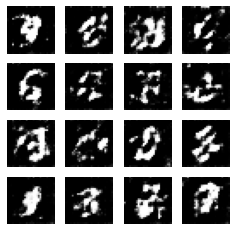

2151 [D loss: 0.9999734657540102] [G loss: 1.0000612245785305]
2152 [D loss: 0.9999660013581888] [G loss: 1.0000556133018108]
2153 [D loss: 0.9999744799970358] [G loss: 1.0000554896978429]
2154 [D loss: 0.9999750155329821] [G loss: 1.0000646441694698]
2155 [D loss: 0.9999664623846911] [G loss: 1.0000557926905458]
2156 [D loss: 0.999967080386341] [G loss: 1.0000610152674199]
2157 [D loss: 0.999968287327647] [G loss: 1.000055168158724]
2158 [D loss: 0.9999672344929422] [G loss: 1.0000681951642036]
2159 [D loss: 0.9999723685577919] [G loss: 1.0000695122871548]
2160 [D loss: 0.9999734960583737] [G loss: 1.0000654274699627]
2161 [D loss: 0.9999662617774447] [G loss: 1.000063774350565]
2162 [D loss: 0.9999688485768274] [G loss: 1.000057941309933]
2163 [D loss: 0.99997493281262] [G loss: 1.0000800821435405]
2164 [D loss: 0.9999682591951569] [G loss: 1.0000662030433887]
2165 [D loss: 0.9999669183744118] [G loss: 1.0000620076607447]
2166 [D loss: 0.9999717444770795] [G loss: 1.0000685588311171]

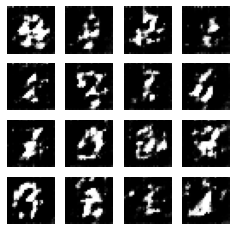

2201 [D loss: 0.9999727825997979] [G loss: 1.0000660246587358]
2202 [D loss: 0.9999746147586848] [G loss: 1.0000777633249527]
2203 [D loss: 0.9999761774452054] [G loss: 1.0000571673517697]
2204 [D loss: 0.9999576729660475] [G loss: 1.0000612624571659]
2205 [D loss: 0.9999630527327099] [G loss: 1.0000697502327967]
2206 [D loss: 0.9999683364767407] [G loss: 1.0000675442861393]
2207 [D loss: 0.999970592551108] [G loss: 1.0000673516624374]
2208 [D loss: 0.9999530814275204] [G loss: 1.0000561340202694]
2209 [D loss: 0.999968938605889] [G loss: 1.000052148650866]
2210 [D loss: 0.9999745059394627] [G loss: 1.0000679806544213]
2211 [D loss: 0.999974761994963] [G loss: 1.0000516880027135]
2212 [D loss: 0.999957600797643] [G loss: 1.000061938619183]
2213 [D loss: 0.9999621478164045] [G loss: 1.0000586321075389]
2214 [D loss: 0.9999721635394963] [G loss: 1.0000626112450846]
2215 [D loss: 0.9999708333634771] [G loss: 1.000060295627918]
2216 [D loss: 0.999970263997966] [G loss: 1.0000589260671404]


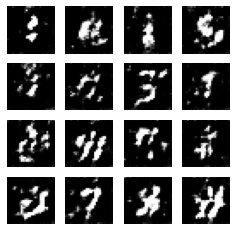

2251 [D loss: 0.9999688896496082] [G loss: 1.0000629472415312]
2252 [D loss: 0.9999691584525863] [G loss: 1.0000688778673066]
2253 [D loss: 0.9999742209656688] [G loss: 1.000062529979914]
2254 [D loss: 0.99996410481981] [G loss: 1.0000533393758815]
2255 [D loss: 0.9999706434973632] [G loss: 1.0000527502779732]
2256 [D loss: 0.9999719511033618] [G loss: 1.0000598088990955]
2257 [D loss: 0.9999673084530514] [G loss: 1.0000603578882874]
2258 [D loss: 0.9999668056188966] [G loss: 1.0000660980149405]
2259 [D loss: 0.9999648850462108] [G loss: 1.0000619263446424]
2260 [D loss: 0.999972816756781] [G loss: 1.0000547017843928]
2261 [D loss: 0.9999702764180256] [G loss: 1.0000651618902339]
2262 [D loss: 0.9999696834674978] [G loss: 1.000064998093876]
2263 [D loss: 0.9999688810858061] [G loss: 1.0000692250469]
2264 [D loss: 0.9999664590322936] [G loss: 1.0000673064641887]
2265 [D loss: 0.9999728527109255] [G loss: 1.0000709560117684]
2266 [D loss: 0.999966282497553] [G loss: 1.0000700663513271]
2

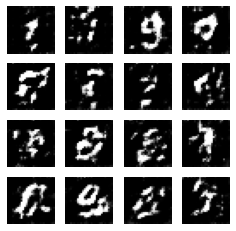

2301 [D loss: 0.9999734152588644] [G loss: 1.0000682521931594]
2302 [D loss: 0.9999630216279911] [G loss: 1.0000566271992284]
2303 [D loss: 0.9999728064758528] [G loss: 1.0000650034489809]
2304 [D loss: 0.9999681935041735] [G loss: 1.0000688511354383]
2305 [D loss: 0.999964630784234] [G loss: 1.0000600962666795]
2306 [D loss: 0.9999642731636413] [G loss: 1.0000735056091798]
2307 [D loss: 0.9999664552597096] [G loss: 1.000072564871516]
2308 [D loss: 0.9999793586030137] [G loss: 1.0000545940529264]
2309 [D loss: 0.9999764720232633] [G loss: 1.0000606236499152]
2310 [D loss: 0.999963242062222] [G loss: 1.0000575215344725]
2311 [D loss: 0.999967145602568] [G loss: 1.0000607276342635]
2312 [D loss: 0.9999703349203628] [G loss: 1.0000585066482017]
2313 [D loss: 0.9999788767927384] [G loss: 1.0000560525259061]
2314 [D loss: 0.999962892892654] [G loss: 1.00005929519466]
2315 [D loss: 0.9999730535309936] [G loss: 1.0000629264905]
2316 [D loss: 0.999960578923492] [G loss: 1.0000602257277933]
231

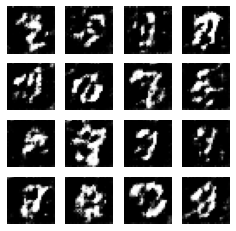

2351 [D loss: 0.9999713949255238] [G loss: 1.0000678799551679]
2352 [D loss: 0.9999769144378661] [G loss: 1.0000593118093093]
2353 [D loss: 0.9999698146857554] [G loss: 1.0000540054425073]
2354 [D loss: 0.9999731861789769] [G loss: 1.0000615794706391]
2355 [D loss: 0.999970246652083] [G loss: 1.000067860353738]
2356 [D loss: 0.9999765777320135] [G loss: 1.000066517473897]
2357 [D loss: 0.999971543726133] [G loss: 1.0000702987308614]
2358 [D loss: 0.999971436423948] [G loss: 1.0000575979502173]
2359 [D loss: 0.9999708545474277] [G loss: 1.0000609778908256]
2360 [D loss: 0.9999746809335193] [G loss: 1.0000604723754805]
2361 [D loss: 0.9999734432967671] [G loss: 1.000061840059061]
2362 [D loss: 0.9999639106572431] [G loss: 1.000064971653046]
2363 [D loss: 0.9999702565946791] [G loss: 1.0000658845892758]
2364 [D loss: 0.9999702931600041] [G loss: 1.0000768995814724]
2365 [D loss: 0.9999766570217616] [G loss: 1.0000553642312298]
2366 [D loss: 0.9999687613708375] [G loss: 1.0000563717876503]

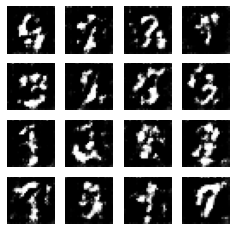

2401 [D loss: 0.999972460376739] [G loss: 1.00006628211122]
2402 [D loss: 0.9999714405348641] [G loss: 1.000058154710132]
2403 [D loss: 0.9999637501223333] [G loss: 1.0000597164180363]
2404 [D loss: 0.9999704717156419] [G loss: 1.0000593210279476]
2405 [D loss: 0.9999740888306405] [G loss: 1.0000696650531609]
2406 [D loss: 0.9999679746833863] [G loss: 1.0000604217311775]
2407 [D loss: 0.9999688209991291] [G loss: 1.0000413611269323]
2408 [D loss: 0.9999655848223483] [G loss: 1.000069942267146]
2409 [D loss: 0.999979194268235] [G loss: 1.0000595559322392]
2410 [D loss: 0.9999706442613387] [G loss: 1.0000535394137842]
2411 [D loss: 0.9999665442628611] [G loss: 1.00007437451859]
2412 [D loss: 0.9999661145993741] [G loss: 1.000068220833782]
2413 [D loss: 0.9999702549830545] [G loss: 1.000062658218667]
2414 [D loss: 0.9999734211414761] [G loss: 1.0000680911616655]
2415 [D loss: 0.9999676897277823] [G loss: 1.0000605676214036]
2416 [D loss: 0.9999689015348849] [G loss: 1.000061079088482]
241

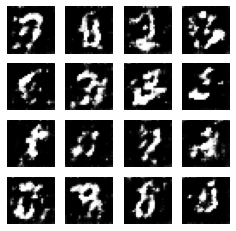

2451 [D loss: 0.999969459082422] [G loss: 1.0000619485872448]
2452 [D loss: 0.9999704534820921] [G loss: 1.0000618925696472]
2453 [D loss: 0.9999640477180947] [G loss: 1.000057457058574]
2454 [D loss: 0.9999749980233901] [G loss: 1.0000655894327792]
2455 [D loss: 0.9999781321275805] [G loss: 1.0000797909524408]
2456 [D loss: 0.9999752433868707] [G loss: 1.0000539796601515]
2457 [D loss: 0.9999707469105488] [G loss: 1.0000499263733218]
2458 [D loss: 0.9999655756910215] [G loss: 1.0000490129787067]
2459 [D loss: 0.9999710978008807] [G loss: 1.0000556880149816]
2460 [D loss: 0.9999662263599021] [G loss: 1.000056382978073]
2461 [D loss: 0.9999674098435207] [G loss: 1.0000794479710748]
2462 [D loss: 0.9999496796663152] [G loss: 1.0000662656020722]
2463 [D loss: 0.9999741482934041] [G loss: 1.0000661234807922]
2464 [D loss: 0.9999553501111222] [G loss: 1.0000615466269664]
2465 [D loss: 0.9999742636209703] [G loss: 1.0000685041741235]
2466 [D loss: 0.9999718711369496] [G loss: 1.0000684070982

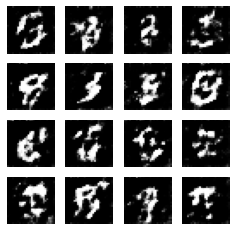

2501 [D loss: 0.9999742583895568] [G loss: 1.0000625911925454]
2502 [D loss: 0.9999688744755986] [G loss: 1.0000636313998257]
2503 [D loss: 0.9999681246226828] [G loss: 1.0000643261155346]
2504 [D loss: 0.9999708040922997] [G loss: 1.0000674641341902]
2505 [D loss: 0.9999710286501795] [G loss: 1.0000645903346594]
2506 [D loss: 0.9999687008876208] [G loss: 1.0000663956379867]
2507 [D loss: 0.9999729349947302] [G loss: 1.0000655517942505]
2508 [D loss: 0.9999686892333557] [G loss: 1.0000655570765957]
2509 [D loss: 0.9999708235554863] [G loss: 1.0000622191728326]
2510 [D loss: 0.9999723007931607] [G loss: 1.0000534025093657]
2511 [D loss: 0.9999677956438973] [G loss: 1.000056052049331]
2512 [D loss: 0.9999632428589393] [G loss: 1.0000501080721733]
2513 [D loss: 0.9999672471676604] [G loss: 1.0000705812126398]
2514 [D loss: 0.9999657087464584] [G loss: 1.000040253817133]
2515 [D loss: 0.9999667409392714] [G loss: 1.0000631015427643]
2516 [D loss: 0.9999734368539066] [G loss: 1.000066558444

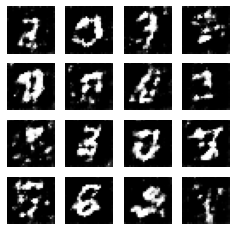

2551 [D loss: 0.9999704358015151] [G loss: 1.000072928305599]
2552 [D loss: 0.9999677383020753] [G loss: 1.0000639254576527]
2553 [D loss: 0.9999766562359582] [G loss: 1.0000748004968045]
2554 [D loss: 0.9999753224437882] [G loss: 1.0000507704680786]
2555 [D loss: 0.9999750964743725] [G loss: 1.0000713227927918]
2556 [D loss: 0.9999670432225685] [G loss: 1.000069203277235]
2557 [D loss: 0.9999726844362158] [G loss: 1.0000496293432661]
2558 [D loss: 0.999974061633111] [G loss: 1.0000627378176432]
2559 [D loss: 0.9999669832577638] [G loss: 1.0000669600703986]
2560 [D loss: 0.9999701177621318] [G loss: 1.0000647123597446]
2561 [D loss: 0.9999744998567621] [G loss: 1.0000543526293768]
2562 [D loss: 0.999972120331222] [G loss: 1.0000544305694348]
2563 [D loss: 0.9999734037046437] [G loss: 1.0000558307110623]
2564 [D loss: 0.9999717413957114] [G loss: 1.0000668869761284]
2565 [D loss: 0.9999759972561151] [G loss: 1.0000620965074631]
2566 [D loss: 0.9999762733241369] [G loss: 1.00005125035750

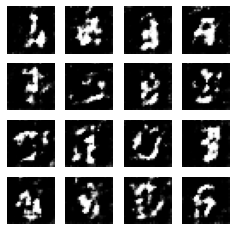

2601 [D loss: 0.9999707701135776] [G loss: 1.0000609743437963]
2602 [D loss: 0.9999724445042375] [G loss: 1.0000605014138273]
2603 [D loss: 0.9999849566265766] [G loss: 1.0000731838517822]
2604 [D loss: 0.9999774807474751] [G loss: 1.0000712718028808]
2605 [D loss: 0.9999632485305483] [G loss: 1.0000593822660448]
2606 [D loss: 0.9999731327297923] [G loss: 1.0000634747120785]
2607 [D loss: 0.9999705099253333] [G loss: 1.0000451968953712]
2608 [D loss: 0.9999692165420129] [G loss: 1.0000516172913194]
2609 [D loss: 0.9999667651027266] [G loss: 1.0000646339030936]
2610 [D loss: 0.9999662949012418] [G loss: 1.0000523060298292]
2611 [D loss: 0.999974893318722] [G loss: 1.0000647115157335]
2612 [D loss: 0.9999696870017942] [G loss: 1.0000614872697042]
2613 [D loss: 0.9999626490607625] [G loss: 1.0000618610647507]
2614 [D loss: 0.9999711230193498] [G loss: 1.0000625305547146]
2615 [D loss: 0.9999700032713008] [G loss: 1.0000546366536582]
2616 [D loss: 0.9999708932045905] [G loss: 1.00006650868

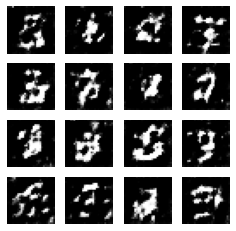

2651 [D loss: 0.9999674369537388] [G loss: 1.0000735280918889]
2652 [D loss: 0.9999674279424653] [G loss: 1.0000689254302415]
2653 [D loss: 0.9999648614175385] [G loss: 1.000059994556068]
2654 [D loss: 0.9999653596823919] [G loss: 1.0000637679040665]
2655 [D loss: 0.9999759832426207] [G loss: 1.0000647691340419]
2656 [D loss: 0.999963737809594] [G loss: 1.0000553340287297]
2657 [D loss: 0.9999764744425192] [G loss: 1.000065709995397]
2658 [D loss: 0.9999565403377346] [G loss: 1.0000660685036564]
2659 [D loss: 0.9999764072854305] [G loss: 1.000063702253101]
2660 [D loss: 0.999975470094796] [G loss: 1.0000561459019082]
2661 [D loss: 0.9999603406413371] [G loss: 1.000055619777413]
2662 [D loss: 0.9999649823148502] [G loss: 1.0000613501179032]
2663 [D loss: 0.9999703179328208] [G loss: 1.0000611692739767]
2664 [D loss: 0.9999700510634284] [G loss: 1.000064152671257]
2665 [D loss: 0.9999683218447899] [G loss: 1.000052695726481]
2666 [D loss: 0.9999742847285233] [G loss: 1.0000793457002146]


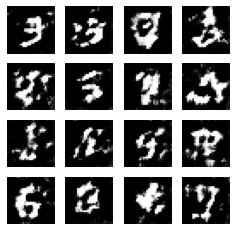

2701 [D loss: 0.9999727468348283] [G loss: 1.0000661177327856]
2702 [D loss: 0.9999679376414861] [G loss: 1.000057882978581]
2703 [D loss: 0.9999812549576745] [G loss: 1.0000677014468238]
2704 [D loss: 0.999967567029671] [G loss: 1.000054614021792]
2705 [D loss: 0.9999647334916517] [G loss: 1.0000735529029043]
2706 [D loss: 0.9999741515675851] [G loss: 1.0000742749252822]
2707 [D loss: 0.9999728573857283] [G loss: 1.000056645294535]
2708 [D loss: 0.9999740028833912] [G loss: 1.000066511296609]
2709 [D loss: 0.9999810028384672] [G loss: 1.0000563475550734]
2710 [D loss: 0.9999715745834692] [G loss: 1.0000614206437604]
2711 [D loss: 0.9999710952142777] [G loss: 1.0000639546633465]
2712 [D loss: 0.9999726479800302] [G loss: 1.0000473350737593]
2713 [D loss: 0.9999635534004483] [G loss: 1.0000600240018684]
2714 [D loss: 0.9999692774290452] [G loss: 1.0000553899153601]
2715 [D loss: 0.9999684886934119] [G loss: 1.000056405646319]
2716 [D loss: 0.9999610756967741] [G loss: 1.0000573175857426

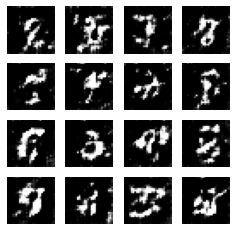

2751 [D loss: 0.9999745932182122] [G loss: 1.0000573045144847]
2752 [D loss: 0.9999745729364804] [G loss: 1.0000642112863716]
2753 [D loss: 0.9999708079267293] [G loss: 1.0000649223802611]
2754 [D loss: 0.9999664181341359] [G loss: 1.000056073309679]
2755 [D loss: 0.999970921955537] [G loss: 1.000065246669692]
2756 [D loss: 0.999961895733577] [G loss: 1.0000764168798923]
2757 [D loss: 0.9999720234845881] [G loss: 1.0000683216931066]
2758 [D loss: 0.9999760930804769] [G loss: 1.000061810555053]
2759 [D loss: 0.999969411350321] [G loss: 1.0000478681977256]
2760 [D loss: 0.9999628837540513] [G loss: 1.0000501834110764]
2761 [D loss: 0.9999792747403262] [G loss: 1.000066682274337]
2762 [D loss: 0.9999736512909294] [G loss: 1.000048177640565]
2763 [D loss: 0.9999730329654994] [G loss: 1.0000520896865055]
2764 [D loss: 0.9999730680865468] [G loss: 1.0000658265635138]
2765 [D loss: 0.9999674677092116] [G loss: 1.0000530068100488]
2766 [D loss: 0.9999660884968762] [G loss: 1.0000514290077263]


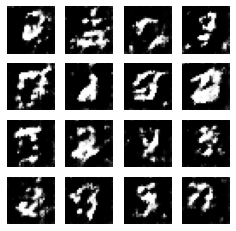

2801 [D loss: 0.9999754649761599] [G loss: 1.0000586937712796]
2802 [D loss: 0.9999737013931735] [G loss: 1.000067486995249]
2803 [D loss: 0.9999696861086704] [G loss: 1.0000788946053945]
2804 [D loss: 0.9999744621345599] [G loss: 1.000061049075157]
2805 [D loss: 0.9999729198862042] [G loss: 1.0000585260786465]
2806 [D loss: 0.9999754784766992] [G loss: 1.0000547579984413]
2807 [D loss: 0.9999787202395964] [G loss: 1.0000605568784522]
2808 [D loss: 0.9999681318913645] [G loss: 1.0000720644748071]
2809 [D loss: 0.9999716107195127] [G loss: 1.0000593617296545]
2810 [D loss: 0.9999707172537455] [G loss: 1.0000604193774052]
2811 [D loss: 0.9999736817771918] [G loss: 1.0000583746259508]
2812 [D loss: 0.9999726748137618] [G loss: 1.0000674787079333]
2813 [D loss: 0.9999637196451658] [G loss: 1.0000657216151012]
2814 [D loss: 0.9999770948925288] [G loss: 1.0000675084666]
2815 [D loss: 0.9999709785406594] [G loss: 1.0000542974303244]
2816 [D loss: 0.9999727578506281] [G loss: 1.000059457113820

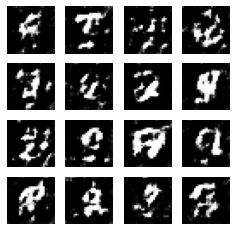

2851 [D loss: 0.9999802110287419] [G loss: 1.000067225722887]
2852 [D loss: 0.9999707250808569] [G loss: 1.0000496028624184]
2853 [D loss: 0.9999681849767512] [G loss: 1.0000643633902655]
2854 [D loss: 0.9999652447731933] [G loss: 1.000056758253777]
2855 [D loss: 0.9999674352511647] [G loss: 1.0000591706448176]
2856 [D loss: 0.9999648917728337] [G loss: 1.0000610962160863]
2857 [D loss: 0.9999685966395191] [G loss: 1.000063188286731]
2858 [D loss: 0.999981213844876] [G loss: 1.0000567295282963]
2859 [D loss: 0.9999749187845737] [G loss: 1.0000668901047902]
2860 [D loss: 0.9999760730970593] [G loss: 1.0000722994154785]
2861 [D loss: 0.9999724423178122] [G loss: 1.000063169769419]
2862 [D loss: 0.9999668788113922] [G loss: 1.0000635560209048]
2863 [D loss: 0.9999682716879761] [G loss: 1.0000637155026197]
2864 [D loss: 0.9999662554473616] [G loss: 1.000064737541834]
2865 [D loss: 0.9999686095543439] [G loss: 1.0000735450230422]
2866 [D loss: 0.9999664869756089] [G loss: 1.000060200018197]

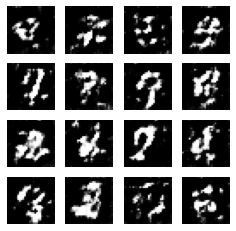

2901 [D loss: 0.9999655332794646] [G loss: 1.0000534223072464]
2902 [D loss: 0.9999667021911591] [G loss: 1.000065003245254]
2903 [D loss: 0.9999672160265618] [G loss: 1.0000494110499858]
2904 [D loss: 0.9999717738646723] [G loss: 1.0000534221762791]
2905 [D loss: 0.9999778095625516] [G loss: 1.000069482222898]
2906 [D loss: 0.9999751722170913] [G loss: 1.000045458196837]
2907 [D loss: 0.9999671192144888] [G loss: 1.000057595618273]
2908 [D loss: 0.9999739408049209] [G loss: 1.0000600438761467]
2909 [D loss: 0.9999661883812223] [G loss: 1.000051397299103]
2910 [D loss: 0.9999582079071843] [G loss: 1.0000610868009971]
2911 [D loss: 0.999975934792019] [G loss: 1.0000688359577907]
2912 [D loss: 0.9999694778452977] [G loss: 1.000050828595704]
2913 [D loss: 0.9999692933597544] [G loss: 1.0000575786689296]
2914 [D loss: 0.999970492128341] [G loss: 1.0000628919151495]
2915 [D loss: 0.9999697633465985] [G loss: 1.0000726118814782]
2916 [D loss: 0.9999707852402935] [G loss: 1.0000493915867992]


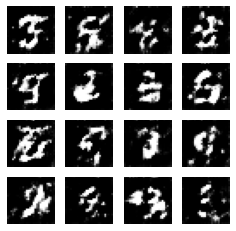

2951 [D loss: 0.9999696154918638] [G loss: 1.0000578390427108]
2952 [D loss: 0.9999741665742476] [G loss: 1.0000640785729047]
2953 [D loss: 0.9999632472572557] [G loss: 1.000053900461353]
2954 [D loss: 0.9999804569742992] [G loss: 1.0000568654504605]
2955 [D loss: 0.9999764606327517] [G loss: 1.0000655284893583]
2956 [D loss: 0.9999715813501098] [G loss: 1.000058905010519]
2957 [D loss: 0.9999740749080956] [G loss: 1.0000631116272416]
2958 [D loss: 0.9999710131742177] [G loss: 1.0000640475336695]
2959 [D loss: 0.9999674895298085] [G loss: 1.0000636108743493]
2960 [D loss: 0.9999744780070614] [G loss: 1.0000583820074098]
2961 [D loss: 0.9999778161982249] [G loss: 1.0000572417848161]
2962 [D loss: 0.9999719742518209] [G loss: 1.0000567535753362]
2963 [D loss: 0.9999680049149902] [G loss: 1.0000473055260954]
2964 [D loss: 0.9999622683808411] [G loss: 1.0000601745086897]
2965 [D loss: 0.9999597440000798] [G loss: 1.0000546237606613]
2966 [D loss: 0.9999650074387318] [G loss: 1.000063438317

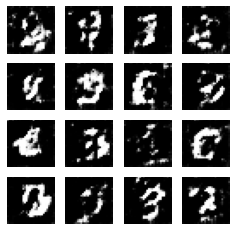

3001 [D loss: 0.9999754649106762] [G loss: 1.0000624647072982]
3002 [D loss: 0.9999653287013643] [G loss: 1.0000574173136556]
3003 [D loss: 0.9999676991574233] [G loss: 1.000060381655203]
3004 [D loss: 0.9999598439662805] [G loss: 1.000060015649069]
3005 [D loss: 0.9999679722022847] [G loss: 1.0000645125910523]
3006 [D loss: 0.9999744950546301] [G loss: 1.0000472452957183]
3007 [D loss: 0.9999685972761654] [G loss: 1.000065975029429]
3008 [D loss: 0.9999721443891758] [G loss: 1.000058809753682]
3009 [D loss: 0.9999712787976023] [G loss: 1.0000547802264919]
3010 [D loss: 0.9999678900276194] [G loss: 1.000059297937696]
3011 [D loss: 0.9999653820414096] [G loss: 1.000057062603446]
3012 [D loss: 0.9999670289416827] [G loss: 1.0000620578066446]
3013 [D loss: 0.999962362300721] [G loss: 1.000050004782679]
3014 [D loss: 0.9999712441567681] [G loss: 1.0000657098280499]
3015 [D loss: 0.9999657564512745] [G loss: 1.000064130523242]
3016 [D loss: 0.9999706750732003] [G loss: 1.0000487956422148]
3

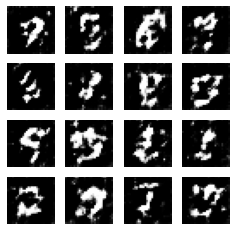

3051 [D loss: 0.9999746762441646] [G loss: 1.0000584148983762]
3052 [D loss: 0.9999799752513354] [G loss: 1.0000682945392327]
3053 [D loss: 0.9999717856189818] [G loss: 1.0000630251524854]
3054 [D loss: 0.9999632553226547] [G loss: 1.000055128832173]
3055 [D loss: 0.9999729590090283] [G loss: 1.0000521940310136]
3056 [D loss: 0.9999633292100043] [G loss: 1.0000521068723174]
3057 [D loss: 0.999968822903611] [G loss: 1.0000621409635642]
3058 [D loss: 0.9999653592676623] [G loss: 1.0000471829989692]
3059 [D loss: 0.9999766134787933] [G loss: 1.0000521275760548]
3060 [D loss: 0.9999712238750362] [G loss: 1.0000715452770237]
3061 [D loss: 0.9999588674363622] [G loss: 1.000060390397266]
3062 [D loss: 0.9999728823386249] [G loss: 1.0000626614855719]
3063 [D loss: 0.9999710673964728] [G loss: 1.0000602368236287]
3064 [D loss: 0.9999530052045884] [G loss: 1.0000700170785422]
3065 [D loss: 0.9999726446585555] [G loss: 1.000050955459301]
3066 [D loss: 0.9999746616595075] [G loss: 1.00003371935235

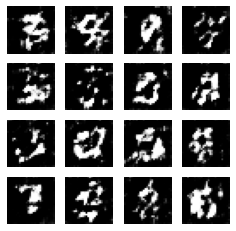

3101 [D loss: 0.9999721019703429] [G loss: 1.0000708427687641]
3102 [D loss: 0.9999673578568036] [G loss: 1.0000681699602865]
3103 [D loss: 0.9999759376441943] [G loss: 1.0000728929517209]
3104 [D loss: 0.9999741883511888] [G loss: 1.00005309345579]
3105 [D loss: 0.9999648294979124] [G loss: 1.0000492295148433]
3106 [D loss: 0.9999736715144536] [G loss: 1.0000479745067423]
3107 [D loss: 0.9999580721560051] [G loss: 1.0000614942837274]
3108 [D loss: 0.9999698746378272] [G loss: 1.000069946028816]
3109 [D loss: 0.9999692939090892] [G loss: 1.0000660180230625]
3110 [D loss: 0.9999682845664211] [G loss: 1.0000634043681202]
3111 [D loss: 0.9999724321169197] [G loss: 1.000066591295763]
3112 [D loss: 0.9999688305906602] [G loss: 1.0000524955212313]
3113 [D loss: 0.9999736124773335] [G loss: 1.0000587625690969]
3114 [D loss: 0.9999699377804063] [G loss: 1.000061226564867]
3115 [D loss: 0.9999795746880409] [G loss: 1.0000659286306472]
3116 [D loss: 0.9999734457378509] [G loss: 1.000073824303399

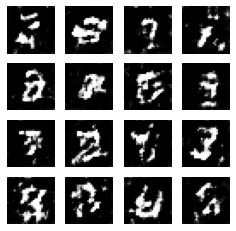

3151 [D loss: 0.9999649761375622] [G loss: 1.0000623726227786]
3152 [D loss: 0.9999642998645868] [G loss: 1.000069862086093]
3153 [D loss: 0.9999713535435149] [G loss: 1.0000666637570248]
3154 [D loss: 0.9999683521709812] [G loss: 1.0000585207344557]
3155 [D loss: 0.9999668773234589] [G loss: 1.0000650457513984]
3156 [D loss: 0.9999737075049779] [G loss: 1.0000647843626211]
3157 [D loss: 0.9999738408878329] [G loss: 1.0000548657262698]
3158 [D loss: 0.9999794634532009] [G loss: 1.0000448709179182]
3159 [D loss: 0.9999747330220998] [G loss: 1.0000608390000707]
3160 [D loss: 0.9999727161339251] [G loss: 1.000069930232712]
3161 [D loss: 0.9999525196144532] [G loss: 1.0000424439276685]
3162 [D loss: 0.9999646338092134] [G loss: 1.000049930808018]
3163 [D loss: 0.9999647397235094] [G loss: 1.0000548836469534]
3164 [D loss: 0.9999636742140865] [G loss: 1.0000728805898689]
3165 [D loss: 0.9999714064688305] [G loss: 1.0000472083120258]
3166 [D loss: 0.9999671915120416] [G loss: 1.0000694933842

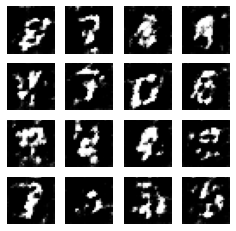

3201 [D loss: 0.9999718973522249] [G loss: 1.0000602080763201]
3202 [D loss: 0.9999664859060431] [G loss: 1.0000610505230725]
3203 [D loss: 0.999974098020175] [G loss: 1.0000569320764043]
3204 [D loss: 0.9999757826735731] [G loss: 1.000053440038755]
3205 [D loss: 0.99998329437949] [G loss: 1.0000596929166932]
3206 [D loss: 0.9999638467779732] [G loss: 1.0000712184046279]
3207 [D loss: 0.9999718947401561] [G loss: 1.0000543652640772]
3208 [D loss: 0.9999734208977316] [G loss: 1.0000589833434788]
3209 [D loss: 0.9999752000330773] [G loss: 1.0000520217727171]
3210 [D loss: 0.9999729324190412] [G loss: 1.0000591509051446]
3211 [D loss: 0.999960685861879] [G loss: 1.0000584069784964]
3212 [D loss: 0.9999690924596507] [G loss: 1.000055998487369]
3213 [D loss: 0.9999697045786888] [G loss: 1.0000535910112376]
3214 [D loss: 0.9999755831631774] [G loss: 1.0000546597802895]
3215 [D loss: 0.9999646558098902] [G loss: 1.0000536680490768]
3216 [D loss: 0.9999792027083458] [G loss: 1.000046729324822]

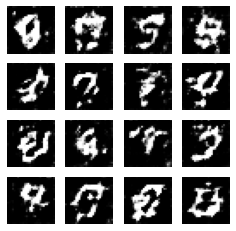

3251 [D loss: 0.9999736250356364] [G loss: 1.0000675914270687]
3252 [D loss: 0.9999712348435423] [G loss: 1.0000641195874778]
3253 [D loss: 0.9999653387421858] [G loss: 1.000070743895776]
3254 [D loss: 0.9999736994650448] [G loss: 1.0000561703272979]
3255 [D loss: 0.9999640300520696] [G loss: 1.0000623933592578]
3256 [D loss: 0.9999660527464584] [G loss: 1.0000440012954641]
3257 [D loss: 0.9999702814457123] [G loss: 1.0000621661529294]
3258 [D loss: 0.9999677919331589] [G loss: 1.0000561945998925]
3259 [D loss: 0.9999697065286455] [G loss: 1.0000570310730836]
3260 [D loss: 0.9999735767050879] [G loss: 1.0000507840995851]
3261 [D loss: 0.9999648379271093] [G loss: 1.0000592332144151]
3262 [D loss: 0.9999722710053902] [G loss: 1.0000556457489438]
3263 [D loss: 0.9999721593922004] [G loss: 1.000053112340538]
3264 [D loss: 0.9999671670339012] [G loss: 1.0000578678882448]
3265 [D loss: 0.9999722914981248] [G loss: 1.0000689748267177]
3266 [D loss: 0.9999762286461191] [G loss: 1.000057181958

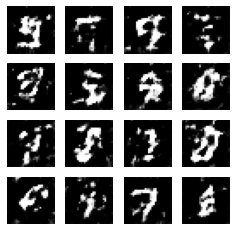

3301 [D loss: 0.9999702018067183] [G loss: 1.000062050545239]
3302 [D loss: 0.9999773197851027] [G loss: 1.0000523480302945]
3303 [D loss: 0.999966923649481] [G loss: 1.0000832805817481]
3304 [D loss: 0.9999701765482314] [G loss: 1.0000781829439802]
3305 [D loss: 0.9999826957537152] [G loss: 1.0000470499580842]
3306 [D loss: 0.9999747057627246] [G loss: 1.0000656754200463]
3307 [D loss: 0.9999744016240584] [G loss: 1.0000533348866156]
3308 [D loss: 0.9999719269326306] [G loss: 1.0000595146193518]
3309 [D loss: 0.9999785004583828] [G loss: 1.0000454395303677]
3310 [D loss: 0.9999755371391075] [G loss: 1.0000435219008068]
3311 [D loss: 0.9999663866765331] [G loss: 1.0000649260327918]
3312 [D loss: 0.9999730781419203] [G loss: 1.000067009088525]
3313 [D loss: 0.9999593765824102] [G loss: 1.000058207413531]
3314 [D loss: 0.9999824497172085] [G loss: 1.0000452538224636]
3315 [D loss: 0.9999636169286532] [G loss: 1.0000519863679074]
3316 [D loss: 0.9999649805631634] [G loss: 1.00004602905755

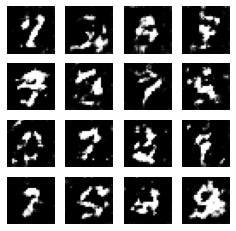

3351 [D loss: 0.9999773386443849] [G loss: 1.0000595783785684]
3352 [D loss: 0.9999791136287968] [G loss: 1.0000465125776827]
3353 [D loss: 0.9999665560826543] [G loss: 1.0000541806184629]
3354 [D loss: 0.9999661259826098] [G loss: 1.000059044596128]
3355 [D loss: 0.9999635318545188] [G loss: 1.0000595229248574]
3356 [D loss: 0.9999748029877082] [G loss: 1.0000606771463936]
3357 [D loss: 0.9999642734546796] [G loss: 1.0000597596008447]
3358 [D loss: 0.9999842231372895] [G loss: 1.0000578509498155]
3359 [D loss: 0.9999629524172633] [G loss: 1.0000571145428694]
3360 [D loss: 0.9999792298767716] [G loss: 1.0000597507059865]
3361 [D loss: 0.9999610172162647] [G loss: 1.000059649686591]
3362 [D loss: 0.9999717240862083] [G loss: 1.0000733889173716]
3363 [D loss: 0.999967034884321] [G loss: 1.0000592998112552]
3364 [D loss: 0.9999723444707342] [G loss: 1.0000715484638931]
3365 [D loss: 0.9999596611414745] [G loss: 1.0000684479091433]
3366 [D loss: 0.9999730176459707] [G loss: 1.0000623797677

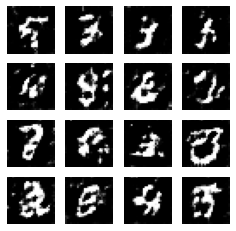

3401 [D loss: 0.9999563442506769] [G loss: 1.0000697282885085]
3402 [D loss: 0.9999666752373741] [G loss: 1.0000694327318342]
3403 [D loss: 0.9999736143508926] [G loss: 1.0000534549253643]
3404 [D loss: 0.9999697391140216] [G loss: 1.0000560162225156]
3405 [D loss: 0.9999766849687148] [G loss: 1.0000653215829516]
3406 [D loss: 0.9999660432658857] [G loss: 1.000065422122134]
3407 [D loss: 0.9999768234010844] [G loss: 1.0000578476356168]
3408 [D loss: 0.9999807341373526] [G loss: 1.0000644257670501]
3409 [D loss: 0.9999608045254718] [G loss: 1.0000558298124815]
3410 [D loss: 0.999961442194035] [G loss: 1.000034924771171]
3411 [D loss: 0.9999728299881099] [G loss: 1.0000541216577403]
3412 [D loss: 0.9999680805722164] [G loss: 1.0000609642920608]
3413 [D loss: 0.9999703287903685] [G loss: 1.0000478088513773]
3414 [D loss: 0.9999712412754889] [G loss: 1.0000539872817171]
3415 [D loss: 0.9999598658705509] [G loss: 1.0000706645078026]
3416 [D loss: 0.9999675495491829] [G loss: 1.0000529435419

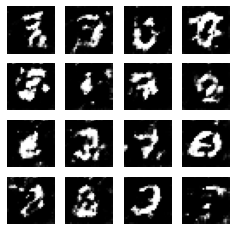

3451 [D loss: 0.9999821673554834] [G loss: 1.0000469438091386]
3452 [D loss: 0.9999739476261311] [G loss: 1.0000411846704083]
3453 [D loss: 0.9999733546865173] [G loss: 1.0000495079548273]
3454 [D loss: 0.9999611024013575] [G loss: 1.0000528241034772]
3455 [D loss: 0.9999742231266282] [G loss: 1.000053877112805]
3456 [D loss: 0.9999805798142916] [G loss: 1.000037001002056]
3457 [D loss: 0.9999605367665936] [G loss: 1.000052013383538]
3458 [D loss: 0.9999749078779132] [G loss: 1.0000590952040511]
3459 [D loss: 0.9999594572673232] [G loss: 1.0000514847051818]
3460 [D loss: 0.9999790125584695] [G loss: 1.0000487724028062]
3461 [D loss: 0.999976122919179] [G loss: 1.0000602009749855]
3462 [D loss: 0.9999703408630012] [G loss: 1.000056015313021]
3463 [D loss: 0.9999708650957473] [G loss: 1.000070620997576]
3464 [D loss: 0.9999663728412997] [G loss: 1.0000579636107432]
3465 [D loss: 0.9999836315946595] [G loss: 1.0000628983980278]
3466 [D loss: 0.9999646435753675] [G loss: 1.0000345356493199

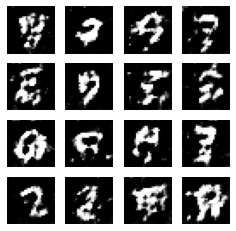

3501 [D loss: 0.9999589910330542] [G loss: 1.000061472557718]
3502 [D loss: 0.9999753887750558] [G loss: 1.000060401376686]
3503 [D loss: 0.9999751532486698] [G loss: 1.0000538365093234]
3504 [D loss: 0.9999733084987383] [G loss: 1.0000483989642817]
3505 [D loss: 0.9999635839449184] [G loss: 1.0000647581618978]
3506 [D loss: 0.9999769301939523] [G loss: 1.0000621087820036]
3507 [D loss: 0.9999716350303061] [G loss: 1.000051107010222]
3508 [D loss: 0.9999679084176023] [G loss: 1.0000618314079475]
3509 [D loss: 0.9999690189870307] [G loss: 1.0000665038242005]
3510 [D loss: 0.9999701200467825] [G loss: 1.000059437530581]
3511 [D loss: 0.9999712249809818] [G loss: 1.000062120059738]
3512 [D loss: 0.9999775274663989] [G loss: 1.0000622004081379]
3513 [D loss: 0.999968686082866] [G loss: 1.0000543255882803]
3514 [D loss: 0.9999797049786139] [G loss: 1.0000765742879594]
3515 [D loss: 0.999967363626638] [G loss: 1.0000541046319995]
3516 [D loss: 0.9999681963090552] [G loss: 1.000051723603974]


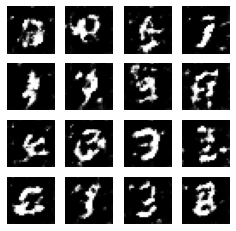

3551 [D loss: 0.9999654002021998] [G loss: 1.0000760122202337]
3552 [D loss: 0.9999571656826447] [G loss: 1.000044378786697]
3553 [D loss: 0.9999801676240168] [G loss: 1.0000555782862648]
3554 [D loss: 0.9999644736126356] [G loss: 1.0000581362219236]
3555 [D loss: 0.9999735549790785] [G loss: 1.000053757092246]
3556 [D loss: 0.9999733537770226] [G loss: 1.0000676315103192]
3557 [D loss: 0.9999682086090615] [G loss: 1.0000654843461234]
3558 [D loss: 0.9999665422146791] [G loss: 1.0000599445047555]
3559 [D loss: 0.9999785796644574] [G loss: 1.0000445489713456]
3560 [D loss: 0.9999706528578827] [G loss: 1.0000580542327953]
3561 [D loss: 0.9999682302750443] [G loss: 1.0000716701033525]
3562 [D loss: 0.9999707423539803] [G loss: 1.000060200367443]
3563 [D loss: 0.9999576711343252] [G loss: 1.0000579579318583]
3564 [D loss: 0.9999644243580406] [G loss: 1.0000658648787066]
3565 [D loss: 0.9999803273167345] [G loss: 1.0000667217173032]
3566 [D loss: 0.9999824368351256] [G loss: 1.0000487832330

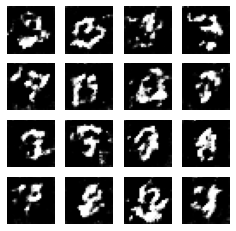

3601 [D loss: 0.9999757656623842] [G loss: 1.0000540266555618]
3602 [D loss: 0.999964385831845] [G loss: 1.0000531601617695]
3603 [D loss: 0.9999689757969463] [G loss: 1.000059420861362]
3604 [D loss: 0.9999668667351216] [G loss: 1.0000530824108864]
3605 [D loss: 0.9999607474037475] [G loss: 1.0000601951178396]
3606 [D loss: 0.9999776540571474] [G loss: 1.000049012254749]
3607 [D loss: 0.9999734825178166] [G loss: 1.0000637635675957]
3608 [D loss: 0.9999670663892175] [G loss: 1.0000572480857954]
3609 [D loss: 0.9999739822305855] [G loss: 1.0000427088452852]
3610 [D loss: 0.999974105754518] [G loss: 1.000050492461014]
3611 [D loss: 0.9999728744660388] [G loss: 1.000063469829911]
3612 [D loss: 0.9999710009033151] [G loss: 1.0000616598699708]
3613 [D loss: 0.9999635601998307] [G loss: 1.000053345473134]
3614 [D loss: 0.9999701039560023] [G loss: 1.0000606521498412]
3615 [D loss: 0.999958498923661] [G loss: 1.0000537279920536]
3616 [D loss: 0.9999598148206132] [G loss: 1.0000642827144475]


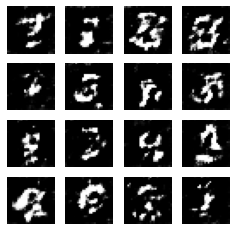

3651 [D loss: 0.9999673960173823] [G loss: 1.0000608359187027]
3652 [D loss: 0.9999730831914349] [G loss: 1.0000346587657987]
3653 [D loss: 0.9999657209191355] [G loss: 1.000065939813794]
3654 [D loss: 0.9999696713093726] [G loss: 1.0000607695037615]
3655 [D loss: 0.9999652279566362] [G loss: 1.0000495582498843]
3656 [D loss: 0.999975960876327] [G loss: 1.000063197578129]
3657 [D loss: 0.9999663165763195] [G loss: 1.0000684345141053]
3658 [D loss: 0.9999675774452044] [G loss: 1.000065277556132]
3659 [D loss: 0.9999640523692506] [G loss: 1.0000545959628653]
3660 [D loss: 0.9999670507604606] [G loss: 1.0000609458438703]
3661 [D loss: 0.9999644365598215] [G loss: 1.0000527361116838]
3662 [D loss: 0.999968344491208] [G loss: 1.0000612498552073]
3663 [D loss: 0.9999727830654592] [G loss: 1.0000554536673008]
3664 [D loss: 0.9999740433340776] [G loss: 1.0000634555253782]
3665 [D loss: 0.9999677375890315] [G loss: 1.000044773270929]
3666 [D loss: 0.9999725020679762] [G loss: 1.0000704382837284

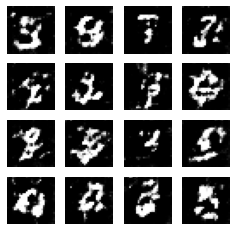

3701 [D loss: 0.9999748993723188] [G loss: 1.0000661674785079]
3702 [D loss: 0.9999735020464868] [G loss: 1.0000520155044796]
3703 [D loss: 0.9999708422801632] [G loss: 1.0000541162589798]
3704 [D loss: 0.9999671001387469] [G loss: 1.0000623796950094]
3705 [D loss: 0.9999684464928578] [G loss: 1.0000644358951831]
3706 [D loss: 0.9999745276036265] [G loss: 1.0000478224355902]
3707 [D loss: 0.9999734185057605] [G loss: 1.0000488972655148]
3708 [D loss: 0.9999646315573045] [G loss: 1.0000552691271878]
3709 [D loss: 0.9999770639442431] [G loss: 1.0000564820038562]
3710 [D loss: 0.9999721568747191] [G loss: 1.000055405740568]
3711 [D loss: 0.999971307865053] [G loss: 1.0000676799754729]
3712 [D loss: 0.9999748700029158] [G loss: 1.0000503824994667]
3713 [D loss: 0.9999692131059419] [G loss: 1.0000526783405803]
3714 [D loss: 0.9999684213398723] [G loss: 1.0000584253721172]
3715 [D loss: 0.9999789660651004] [G loss: 1.000055511987739]
3716 [D loss: 0.9999640521673427] [G loss: 1.0000662113161

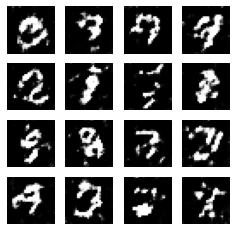

3751 [D loss: 0.9999675298276998] [G loss: 1.000048721951316]
3752 [D loss: 0.9999681207209505] [G loss: 1.0000390025488741]
3753 [D loss: 0.999970377801219] [G loss: 1.0000434590147051]
3754 [D loss: 0.9999636951160937] [G loss: 1.0000494043924846]
3755 [D loss: 0.9999749624003016] [G loss: 1.0000503091941937]
3756 [D loss: 0.999980065280397] [G loss: 1.0000542295820196]
3757 [D loss: 0.9999659015375073] [G loss: 1.0000508326047566]
3758 [D loss: 0.9999765961365483] [G loss: 1.0000514994790137]
3759 [D loss: 0.9999653115701221] [G loss: 1.0000595042365603]
3760 [D loss: 0.9999704089350416] [G loss: 1.0000468258840556]
3761 [D loss: 0.9999793311108078] [G loss: 1.0000549698161194]
3762 [D loss: 0.9999718734343332] [G loss: 1.0000480805028928]
3763 [D loss: 0.9999734902266937] [G loss: 1.0000418839117629]
3764 [D loss: 0.9999721442654845] [G loss: 1.000046859277063]
3765 [D loss: 0.9999698083229305] [G loss: 1.0000503627670696]
3766 [D loss: 0.9999825415288797] [G loss: 1.00003993127393

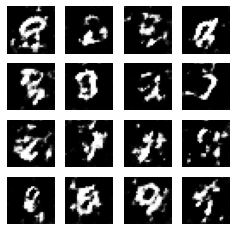

3801 [D loss: 0.9999711954587838] [G loss: 1.000057450022723]
3802 [D loss: 0.999970776745613] [G loss: 1.000056885102822]
3803 [D loss: 0.9999716965612606] [G loss: 1.0000532957637915]
3804 [D loss: 0.9999704749243392] [G loss: 1.0000612049625488]
3805 [D loss: 0.9999728216280346] [G loss: 1.000061941871536]
3806 [D loss: 0.9999776890508656] [G loss: 1.0000492319923069]
3807 [D loss: 0.9999757523291919] [G loss: 1.000058947778598]
3808 [D loss: 0.999981374527124] [G loss: 1.000051331375289]
3809 [D loss: 0.9999760286955279] [G loss: 1.0000455682020402]
3810 [D loss: 0.9999630517377227] [G loss: 1.0000586219794059]
3811 [D loss: 0.9999689927572035] [G loss: 1.0000576746533625]
3812 [D loss: 0.9999787919114169] [G loss: 1.0000607394249528]
3813 [D loss: 0.9999792766939208] [G loss: 1.0000410479369748]
3814 [D loss: 0.9999703953817516] [G loss: 1.00005980811693]
3815 [D loss: 0.9999623655203322] [G loss: 1.0000396819523303]
3816 [D loss: 0.999964395268762] [G loss: 1.0000604339584243]
38

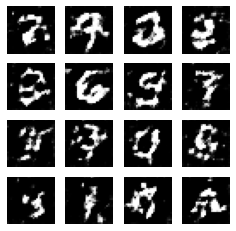

3851 [D loss: 0.9999585348268738] [G loss: 1.0000659542856738]
3852 [D loss: 0.9999728527764091] [G loss: 1.0000518756569363]
3853 [D loss: 0.9999710565607529] [G loss: 1.0000394173257519]
3854 [D loss: 0.9999624466217938] [G loss: 1.0000749533210183]
3855 [D loss: 0.9999653558315913] [G loss: 1.0000571907912672]
3856 [D loss: 0.9999755701574031] [G loss: 1.000057112367358]
3857 [D loss: 0.999965253229675] [G loss: 1.0000533126294613]
3858 [D loss: 0.9999748195477878] [G loss: 1.0000561003107578]
3859 [D loss: 0.9999730627932877] [G loss: 1.0000597584767092]
3860 [D loss: 0.9999703396715631] [G loss: 1.0000631413859082]
3861 [D loss: 0.9999719141778769] [G loss: 1.0000562337154406]
3862 [D loss: 0.9999609150218021] [G loss: 1.000060190432123]
3863 [D loss: 0.9999751306349935] [G loss: 1.000062636245275]
3864 [D loss: 0.9999697261591791] [G loss: 1.0000586994974583]
3865 [D loss: 0.9999659240511392] [G loss: 1.0000734675486456]
3866 [D loss: 0.9999725559609942] [G loss: 1.00007318749703

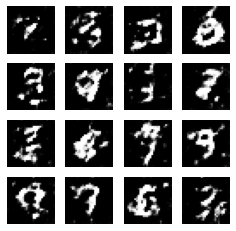

3901 [D loss: 0.9999736544341431] [G loss: 1.0000446226040367]
3902 [D loss: 0.9999680289074604] [G loss: 1.0000510686659254]
3903 [D loss: 0.9999755435273983] [G loss: 1.0000542418056284]
3904 [D loss: 0.9999675425897294] [G loss: 1.0000513446611876]
3905 [D loss: 0.9999639675443177] [G loss: 1.0000614688615315]
3906 [D loss: 0.9999693748468417] [G loss: 1.000042891359044]
3907 [D loss: 0.9999756790966785] [G loss: 1.0000576255588385]
3908 [D loss: 0.9999773656272737] [G loss: 1.000071347116318]
3909 [D loss: 0.9999852270157135] [G loss: 1.000051292583521]
3910 [D loss: 0.9999645883035555] [G loss: 1.0000577388345846]
3911 [D loss: 0.9999750686401967] [G loss: 1.0000651351147098]
3912 [D loss: 0.9999680030814488] [G loss: 1.0000662322781864]
3913 [D loss: 0.9999661964229745] [G loss: 1.0000557864186703]
3914 [D loss: 0.9999707046226831] [G loss: 1.0000420624710387]
3915 [D loss: 0.9999757168043288] [G loss: 1.0000666551786708]
3916 [D loss: 0.9999743637381471] [G loss: 1.0000705737256

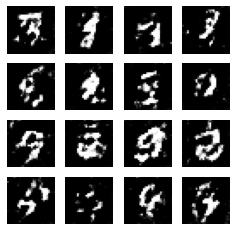

3951 [D loss: 0.9999696983140893] [G loss: 1.0000521916117577]
3952 [D loss: 0.9999762328443467] [G loss: 1.0000549951437279]
3953 [D loss: 0.9999842329925741] [G loss: 1.0000469319420517]
3954 [D loss: 0.9999644477757101] [G loss: 1.000048880741815]
3955 [D loss: 0.9999762812549307] [G loss: 1.0000415058129875]
3956 [D loss: 0.9999643334012944] [G loss: 1.0000614784657955]
3957 [D loss: 0.9999649964374839] [G loss: 1.0000550273398403]
3958 [D loss: 0.999975530361553] [G loss: 1.0000633194140391]
3959 [D loss: 0.9999612659667036] [G loss: 1.0000579829502385]
3960 [D loss: 0.9999771576767671] [G loss: 1.0000449534054496]
3961 [D loss: 0.999963292004395] [G loss: 1.0000521116926393]
3962 [D loss: 0.9999763101077406] [G loss: 1.0000554186481168]
3963 [D loss: 0.9999707915740146] [G loss: 1.0000395109091187]
3964 [D loss: 0.9999752742623969] [G loss: 1.0000595098354097]
3965 [D loss: 0.9999713017823524] [G loss: 1.0000612272633589]
3966 [D loss: 0.9999685325055907] [G loss: 1.0000560038279

In [4]:
train(4000, 32, 50)